# Projeto Módulo: Técnicas de Programação 1
## Prof. Victor Brito

## Equipe 5:

### - ANDRÉ LUIZ P. FRANÇA

### - FLANDERSON PRATES

### - FRANCISCO LUCAS LIMA DOS SANTOS

### - JAQUELINE KATIA ZANÃO BONNEVIALLE

### Análise de conjunto de dados sobre os jogadores de futebol das Premier League, Bundesliga, La Liga, Serie A, Ligue 1.

https://www.kaggle.com/datasets/orkunaktas/all-football-players-stats-in-top-5-leagues-2324/data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 500

In [4]:
# Configurações para melhorar a visualização do DataFrame

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', None)
pd.set_option('display.precision', 2)

In [5]:
# Carregando cada arquivo:

top5_df = pd.read_csv('top5-players.csv')
top5_df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,1237,13.7,0,1,1,0,0,0,1,0,0.0,0.0,0.8,0.9,22.0,43.0,26.0,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,1267,14.1,2,2,4,2,0,0,3,1,2.0,2.0,1.9,3.8,37.0,56.0,91.0,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,101,1.1,0,1,1,0,0,0,0,0,0.1,0.1,0.1,0.2,2.0,5.0,7.0,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,4,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,2781,30.9,4,0,4,3,1,1,5,0,3.4,2.6,0.3,2.9,36.0,137.0,9.0,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


## Desempenho por Liga
Isso nos permitirá obter uma visão geral das diferentes competições e como elas influenciam o desempenho dos jogadores.

Com essa análise, podemos ver se existe uma liga que se destaca no ataque ou se as diferenças são menores entre as principais ligas europeias.

Objetivo: identificar padrões de jogo, níveis de competitividade e diferenças táticas.

Vamos comparar os desempenhos médios de cada liga em termos de:

- Gols por 90 minutos (Gls_90)

- Assistências por 90 minutos (Ast_90)

- Gols esperados por 90 minutos (xG_90)

- Assistências esperadas por 90 minutos (xAG_90)

In [6]:
# Agrupando os dados por liga (Comp) e calculando as médias de gols e assistências por 90 minutos
league_performance = top5_df.groupby('Comp').agg({
    'Gls_90': 'mean',
    'Ast_90': 'mean',
    'xG_90': 'mean',
    'xAG_90': 'mean'
}).reset_index()

# Renomeando as colunas para facilitar a interpretação
league_performance.columns = ['Liga', 'Gols por 90min (média)', 'Assistências por 90min (média)', 'Gols esperados por 90min (média)', 'Assistências esperadas por 90min (média)']

# Exibir o resultado
league_performance


,Liga,Gols por 90min (média),Assistências por 90min (média),Gols esperados por 90min (média),Assistências esperadas por 90min (média)
0,de Bundesliga,0.13,0.13,0.16,0.12
1,eng Premier League,0.13,0.09,0.14,0.10
2,es La Liga,0.10,0.07,0.12,0.09
3,fr Ligue 1,0.12,0.09,0.13,0.11
4,it Serie A,0.13,0.09,0.11,0.08


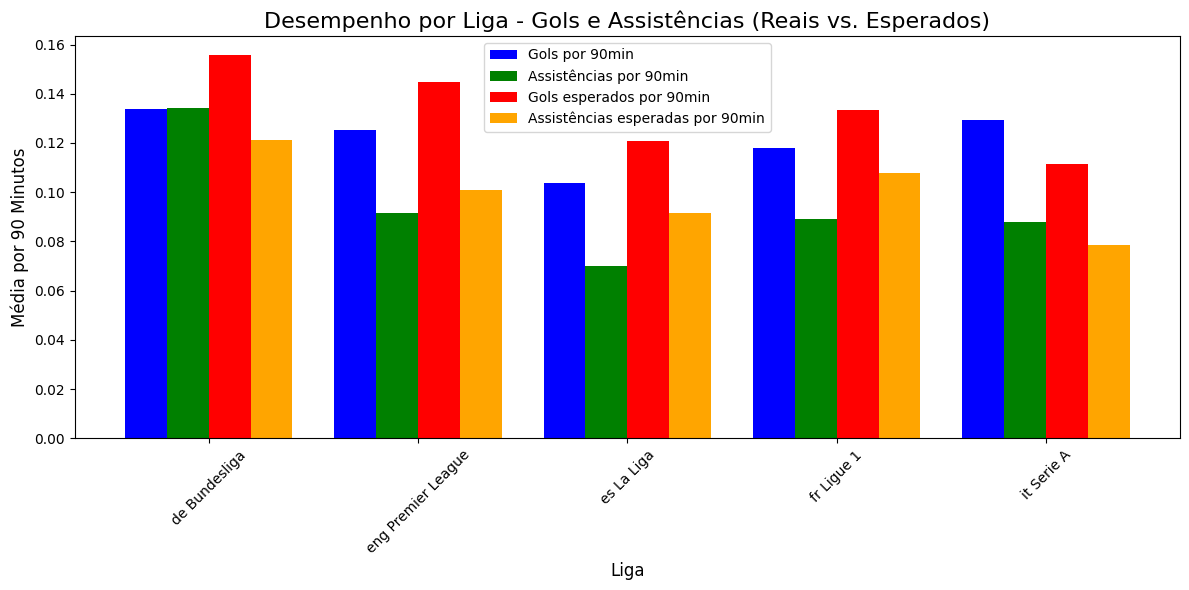

In [7]:
# Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

# Definir o número de ligas (categorias) e sua posição
num_ligas = len(league_performance['Liga'])
indices = range(num_ligas)

# Largura de cada barra
bar_width = 0.2

# Posicionamento das barras
positions_gols = [i - bar_width*1.5 for i in indices]
positions_assistencias = [i - bar_width*0.5 for i in indices]
positions_gols_esperados = [i + bar_width*0.5 for i in indices]
positions_assistencias_esperadas = [i + bar_width*1.5 for i in indices]

# Plotando as barras
plt.bar(positions_gols, league_performance['Gols por 90min (média)'], width=bar_width, label='Gols por 90min', color='blue')
plt.bar(positions_assistencias, league_performance['Assistências por 90min (média)'], width=bar_width, label='Assistências por 90min', color='green')
plt.bar(positions_gols_esperados, league_performance['Gols esperados por 90min (média)'], width=bar_width, label='Gols esperados por 90min', color='red')
plt.bar(positions_assistencias_esperadas, league_performance['Assistências esperadas por 90min (média)'], width=bar_width, label='Assistências esperadas por 90min', color='orange')

# Adicionando títulos e rótulos
plt.title('Desempenho por Liga - Gols e Assistências (Reais vs. Esperados)', fontsize=16)
plt.xlabel('Liga', fontsize=12)
plt.ylabel('Média por 90 Minutos', fontsize=12)
plt.xticks(indices, league_performance['Liga'], rotation=45)

# Exibir legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()



## Eficiência Ofensiva: Jogadores que superam suas expectativas de gols

Queremos identificar jogadores cujo número de gols marcados por 90 minutos (Gls_90) supera significativamente suas expectativas de gols (xG_90).

Podemos calcular a diferença entre essas duas métricas e encontrar os jogadores com a maior diferença positiva, ou seja, os que estão excedendo suas expectativas de finalização.


In [8]:
# Adicionando uma nova coluna para a diferença entre gols e gols esperados
top5_df['Diferença_Gls_xG'] = top5_df['Gls_90'] - top5_df['xG_90']

# Ordenando os jogadores pela diferença, do maior para o menor
top_offensive_players = top5_df[['Player', 'Squad', 'Pos', 'Gls_90', 'xG_90', 'Diferença_Gls_xG']].sort_values(by='Diferença_Gls_xG', ascending=False)

# Exibindo os 10 jogadores que mais superaram suas expectativas de gols
top_offensive_players.head(10)


,Player,Squad,Pos,Gls_90,xG_90,Diferença_Gls_xG
682,Federico Di Francesco,Lecce,"FW,MF",6.00,0.53,5.47
2627,Chaka Traorè,Milan,FW,4.50,0.35,4.15
1694,Nolan Mbemba,Le Havre,MF,4.09,0.17,3.92
2369,Zanos Savva,Torino,"DF,MF",3.21,0.51,2.70
1850,Kingstone Mutandwa,Cagliari,"FW,MF",2.31,0.17,2.14
788,George Earthy,West Ham,FW,2.65,0.82,1.83
1911,Lukas Nmecha,Wolfsburg,FW,2.14,0.31,1.83
2030,Miloš Pantović,Union Berlin,MF,6.00,4.55,1.45
2683,Alejo Véliz,Tottenham,FW,1.80,0.45,1.35
582,Oscar Cortés,Lens,"FW,MF",2.05,0.93,1.12


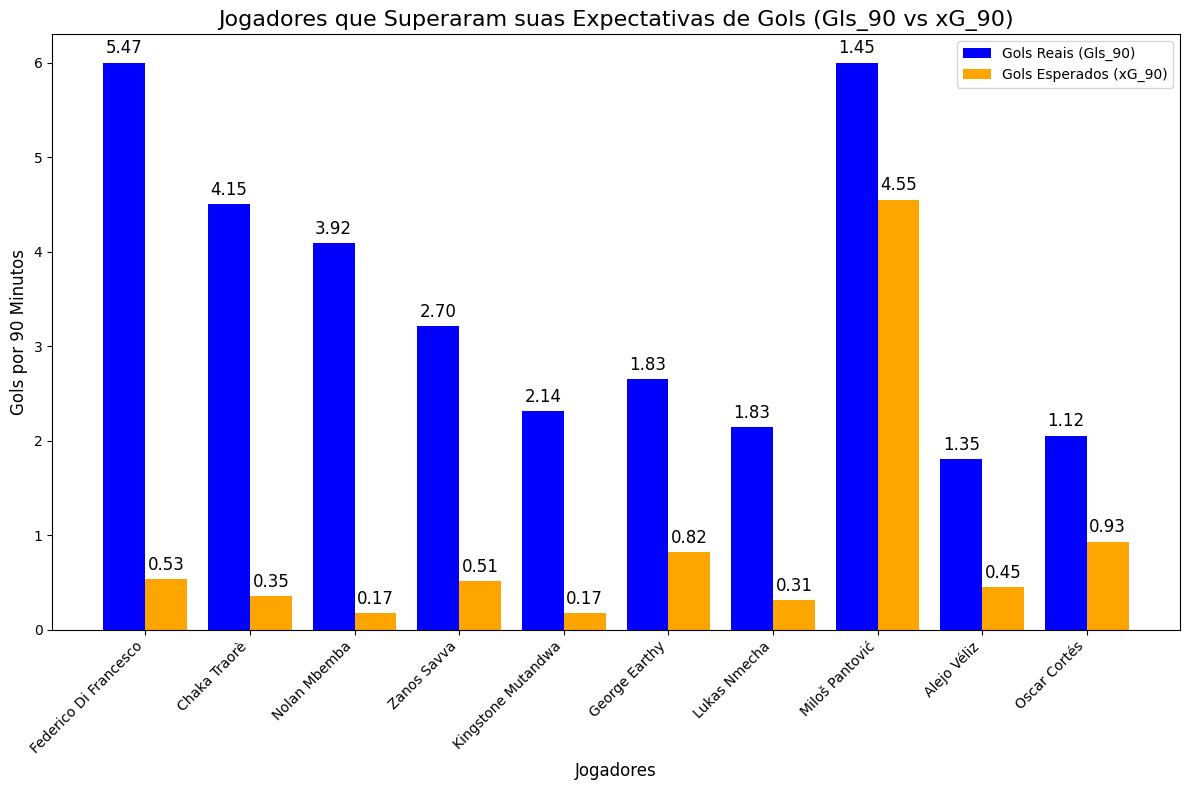

In [9]:
# Selecionar os 10 jogadores que mais superaram suas expectativas de gols
top_10_offensive_players = top_offensive_players.head(10)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Largura das barras
bar_width = 0.4
indices = range(len(top_10_offensive_players))

# Criar as barras para Gols Reais (Gls_90)
plt.bar(indices, top_10_offensive_players['Gls_90'], width=bar_width, color='blue', label='Gols Reais (Gls_90)')

# Criar as barras para Gols Esperados (xG_90)
plt.bar([i + bar_width for i in indices], top_10_offensive_players['xG_90'], width=bar_width, color='orange', label='Gols Esperados (xG_90)')

# Adicionar títulos e rótulos
plt.title('Jogadores que Superaram suas Expectativas de Gols (Gls_90 vs xG_90)', fontsize=16)
plt.xlabel('Jogadores', fontsize=12)
plt.ylabel('Gols por 90 Minutos', fontsize=12)

# Rótulos no eixo X (nomes dos jogadores)
plt.xticks([i + bar_width / 2 for i in indices], top_10_offensive_players['Player'], rotation=45, ha='right')

# Adicionar as diferenças de Gls_90 - xG_90 como texto ao lado das barras
for i in indices:
    plt.text(i, top_10_offensive_players['Gls_90'].iloc[i] + 0.1, f"{top_10_offensive_players['Diferença_Gls_xG'].iloc[i]:.2f}",
             ha='center', color='black', fontsize=12)
    plt.text(i + bar_width, top_10_offensive_players['xG_90'].iloc[i] + 0.1, f"{top_10_offensive_players['xG_90'].iloc[i]:.2f}",
             ha='center', color='black', fontsize=12)

# Exibir a legenda
plt.legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()



## Contribuição Total para o Time: G+A vs. G+A esperados
Aqui queremos identificar jogadores cuja contribuição ofensiva total, medida por Gols + Assistências por 90 minutos (G+A_90), supera suas expectativas, que são medidas por Gols esperados + Assistências esperadas por 90 minutos (xG+xAG_90).

Assim como na análise anterior, calcularemos a diferença entre essas duas métricas para encontrar os jogadores com maior contribuição ofensiva além do esperado.


In [10]:
# Adicionando uma nova coluna para a diferença entre G+A e G+A esperados
top5_df['Diferença_G+A_xG+xAG'] = top5_df['G+A_90'] - top5_df['xG+xAG_90']

# Ordenando os jogadores pela diferença, do maior para o menor
top_contribution_players = top5_df[['Player', 'Squad', 'Pos', 'G+A_90', 'xG+xAG_90', 'Diferença_G+A_xG+xAG']].sort_values(by='Diferença_G+A_xG+xAG', ascending=False)

# Exibindo os 10 jogadores que mais superaram suas expectativas em termos de G+A
top_contribution_players.head(10)


,Player,Squad,Pos,G+A_90,xG+xAG_90,Diferença_G+A_xG+xAG
409,Rareș-Cătălin Burnete,Lecce,FW,11.25,0.71,10.54
682,Federico Di Francesco,Lecce,"FW,MF",6.00,0.53,5.47
1397,Christian Kühlwetter,Heidenheim,MF,11.25,6.85,4.40
2627,Chaka Traorè,Milan,FW,4.50,0.35,4.15
1694,Nolan Mbemba,Le Havre,MF,4.09,0.17,3.92
513,Timothy Chandler,Eint Frankfurt,"MF,DF",5.00,1.09,3.91
2369,Zanos Savva,Torino,"DF,MF",3.21,0.51,2.70
1688,Noah Mbamba,Leverkusen,MF,5.63,3.30,2.33
1850,Kingstone Mutandwa,Cagliari,"FW,MF",2.31,0.17,2.14
622,Trévis Dago,Lille,"FW,MF",3.91,1.78,2.13


<ipython-input-11-723b77cc4391>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_contribution_players['Player_Info'] = top_10_contribution_players['Player'] + ' (' + top_10_contribution_players['Squad'] + ', ' + top_10_contribution_players['Pos'] + ')'


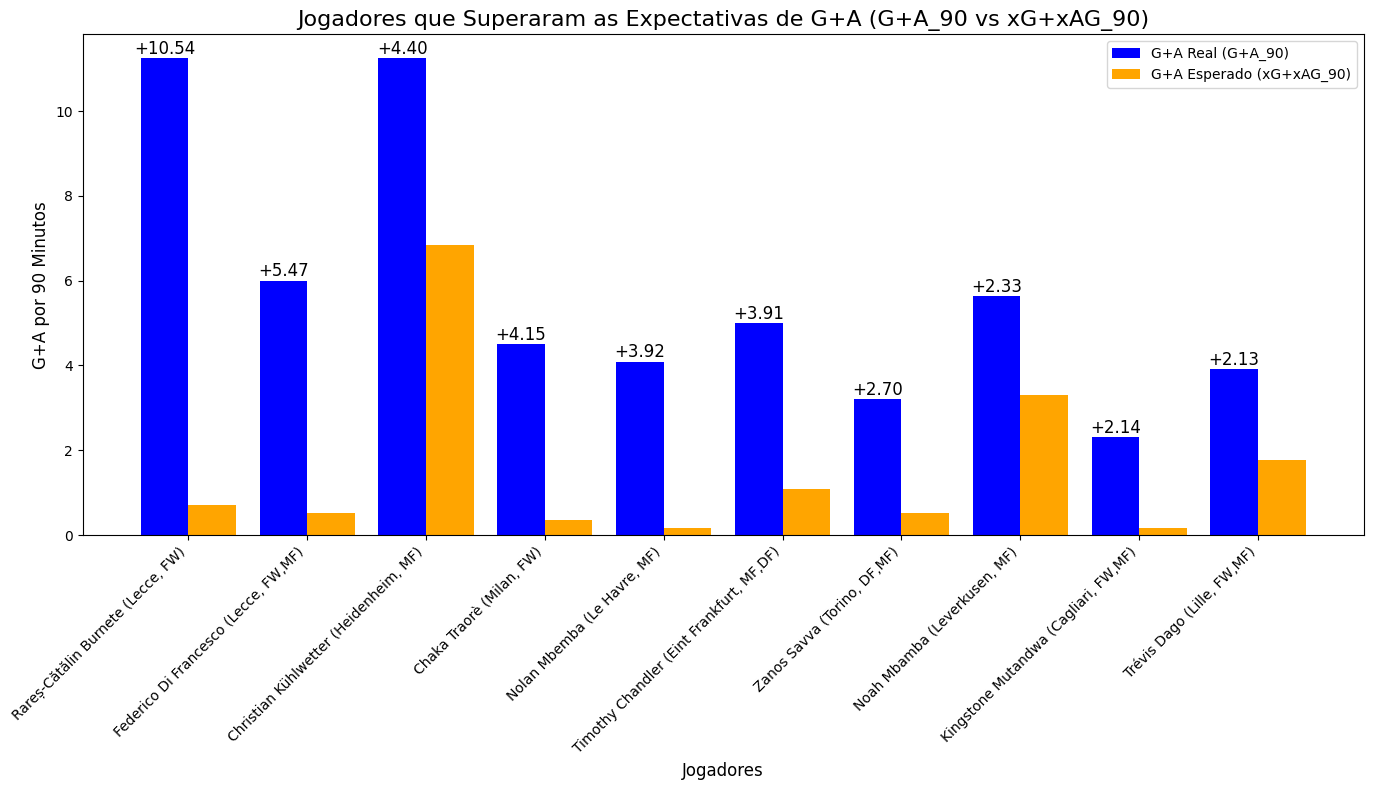

In [11]:
# Selecionar os 10 jogadores com maior diferença entre G+A e G+A esperados
top_10_contribution_players = top_contribution_players.head(10)

# Criar uma coluna combinada com nome, equipe e posição para exibir nos rótulos
top_10_contribution_players['Player_Info'] = top_10_contribution_players['Player'] + ' (' + top_10_contribution_players['Squad'] + ', ' + top_10_contribution_players['Pos'] + ')'

# Definir o tamanho da figura
plt.figure(figsize=(14, 8))

# Largura das barras
bar_width = 0.4
indices = range(len(top_10_contribution_players))

# Criar as barras para G+A_90 (gols e assistências reais)
plt.bar(indices, top_10_contribution_players['G+A_90'], width=bar_width, color='blue', label='G+A Real (G+A_90)')

# Criar as barras para xG+xAG_90 (gols e assistências esperados), deslocadas à direita
plt.bar([i + bar_width for i in indices], top_10_contribution_players['xG+xAG_90'], width=bar_width, color='orange', label='G+A Esperado (xG+xAG_90)')

# Adicionar títulos e rótulos
plt.title('Jogadores que Superaram as Expectativas de G+A (G+A_90 vs xG+xAG_90)', fontsize=16)
plt.xlabel('Jogadores', fontsize=12)
plt.ylabel('G+A por 90 Minutos', fontsize=12)

# Rótulos no eixo X (nomes dos jogadores)
plt.xticks([i + bar_width / 2 for i in indices], top_10_contribution_players['Player_Info'], rotation=45, ha='right')

# Adicionar as diferenças como texto acima das barras de G+A reais
for i in indices:
    plt.text(i, top_10_contribution_players['G+A_90'].iloc[i] + 0.1,
             f"+{top_10_contribution_players['Diferença_G+A_xG+xAG'].iloc[i]:.2f}",
             ha='center', color='black', fontsize=12)

# Exibir a legenda
plt.legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()



## Impacto da Idade no Desempenho

Nesta análise, queremos verificar como a idade dos jogadores influencia o seu desempenho em termos de:

- Gols por 90 minutos (Gls_90)
- Assistências por 90 minutos (Ast_90)
- Gols esperados (xG_90) e assistências esperadas (xAG_90)

A ideia é dividir os jogadores em faixas etárias, como:

- Jogadores Jovens: Menores de 25 anos
- Jogadores Experientes: Acima de 30 anos

Com isso, podemos calcular a média de desempenho em cada grupo e verificar se há tendências claras em termos de contribuições ofensivas por faixa etária.

In [12]:
# Definindo as faixas etárias
young_players = top5_df[top5_df['Age'] < 25]
experienced_players = top5_df[top5_df['Age'] > 30]

# Calculando as médias para os jogadores jovens
young_performance = young_players[['Gls_90', 'Ast_90', 'xG_90', 'xAG_90']].mean()

# Calculando as médias para os jogadores experientes
experienced_performance = experienced_players[['Gls_90', 'Ast_90', 'xG_90', 'xAG_90']].mean()

# Criando um DataFrame para facilitar a comparação
age_performance_comparison = pd.DataFrame({
    'Métrica': ['Gols por 90min', 'Assistências por 90min', 'Gols Esperados por 90min', 'Assistências Esperadas por 90min'],
    'Jogadores Jovens (< 25)': young_performance.values,
    'Jogadores Experientes (> 30)': experienced_performance.values
})

# Exibir o resultado da comparação
age_performance_comparison


,Métrica,Jogadores Jovens (< 25),Jogadores Experientes (> 30)
0,Gols por 90min,0.12,0.10
1,Assistências por 90min,0.10,0.09
2,Gols Esperados por 90min,0.14,0.12
3,Assistências Esperadas por 90min,0.10,0.10


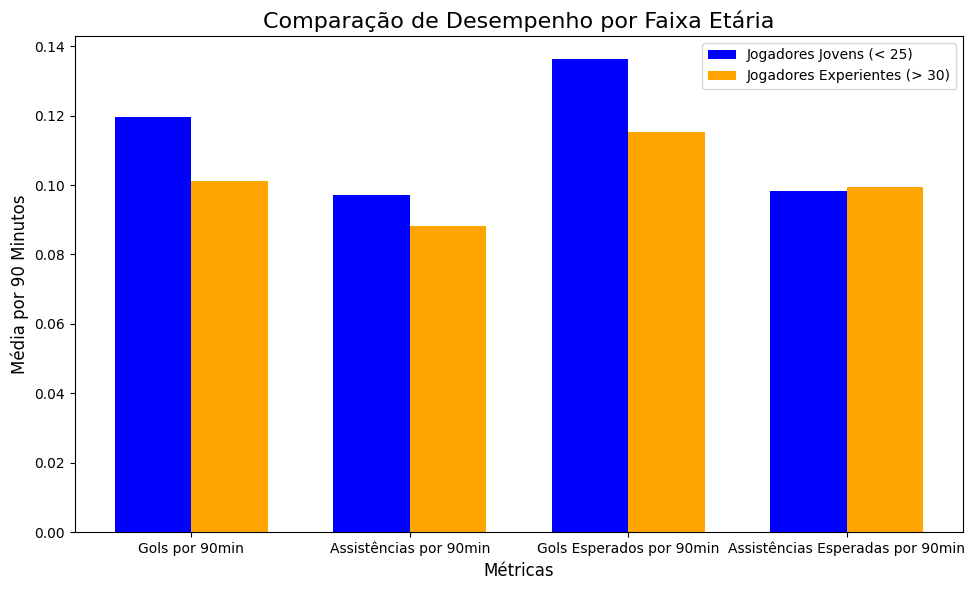

In [13]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Definir as categorias (métricas)
metrics = age_performance_comparison['Métrica']

# Definir as barras para cada faixa etária
bar_width = 0.35
indices = range(len(metrics))

# Plotar as barras
plt.bar(indices, age_performance_comparison['Jogadores Jovens (< 25)'], width=bar_width, label='Jogadores Jovens (< 25)', color='blue')
plt.bar([i + bar_width for i in indices], age_performance_comparison['Jogadores Experientes (> 30)'], width=bar_width, label='Jogadores Experientes (> 30)', color='orange')

# Adicionar rótulos e título
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Média por 90 Minutos', fontsize=12)
plt.title('Comparação de Desempenho por Faixa Etária', fontsize=16)
plt.xticks([i + bar_width/2 for i in indices], metrics)

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Impacto da Idade no Desempenho - Análise por desvio padrão

Nesta análise, queremos verificar como a idade dos jogadores influencia o seu desempenho em termos de:

Gols por 90 minutos (Gls_90)
- Assistências por 90 minutos (Ast_90)
- Gols esperados (xG_90) e assistências esperadas (xAG_90)

A ideia é dividir os jogadores em faixas etárias, como:

- Jogadores Jovens: Menores de 25 anos
- Jogadores Experientes: Acima de 30 anos

Com isso, podemos calcular a média de desempenho em cada grupo e verificar se há tendências claras em termos de contribuições ofensivas por faixa etária.

In [14]:
# Definindo as faixas etárias
young_players = top5_df[top5_df['Age'] < 25]
experienced_players = top5_df[top5_df['Age'] > 30]

# Calculando as médias para os jogadores jovens
young_performance = young_players[['Gls_90', 'Ast_90', 'xG_90', 'xAG_90']].mean()

# Calculando as médias para os jogadores experientes
experienced_performance = experienced_players[['Gls_90', 'Ast_90', 'xG_90', 'xAG_90']].mean()

# Calculando os desvios padrão para os jogadores jovens
young_std = young_players[['Gls_90', 'Ast_90', 'xG_90', 'xAG_90']].std()

# Calculando os desvios padrão para os jogadores experientes
experienced_std = experienced_players[['Gls_90', 'Ast_90', 'xG_90', 'xAG_90']].std()

# Criando um DataFrame para facilitar a comparação
age_performance_comparison = pd.DataFrame({
    'Métrica': ['Gols por 90min', 'Assistências por 90min', 'Gols Esperados por 90min', 'Assistências Esperadas por 90min'],
    'Jogadores Jovens (< 25)': young_performance.values,
    'Desvio_Jovens': young_std.values,
    'Jogadores Experientes (> 30)': experienced_performance.values,
    'Desvio_Experientes': experienced_std.values
})

# Exibir o resultado da comparação
age_performance_comparison

,Métrica,Jogadores Jovens (< 25),Desvio_Jovens,Jogadores Experientes (> 30),Desvio_Experientes
0,Gols por 90min,0.12,0.27,0.10,0.18
1,Assistências por 90min,0.10,0.39,0.09,0.28
2,Gols Esperados por 90min,0.14,0.22,0.12,0.17
3,Assistências Esperadas por 90min,0.10,0.20,0.10,0.28


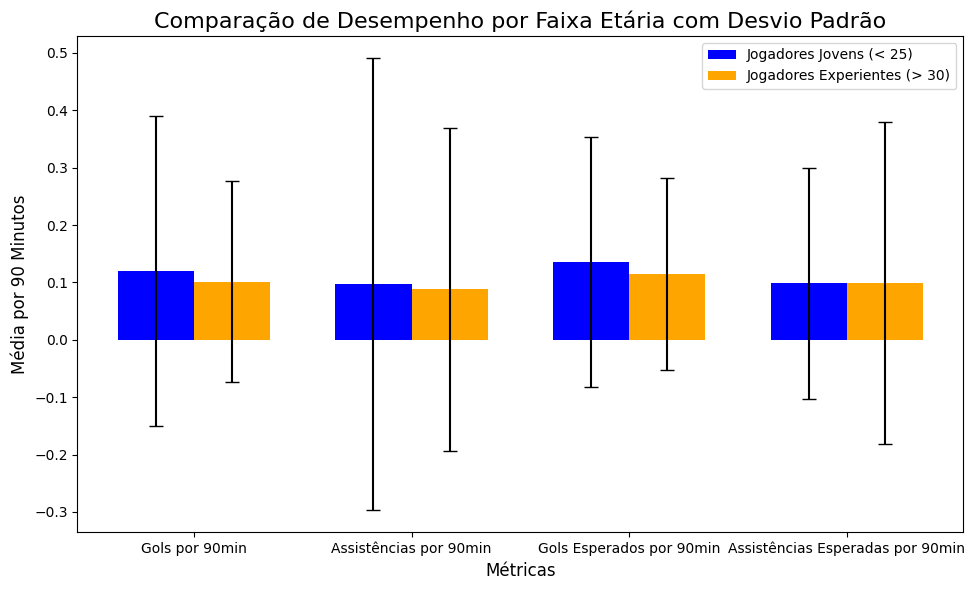

In [15]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Definir as categorias (métricas)
metrics = age_performance_comparison['Métrica']

# Definir as barras para cada faixa etária
bar_width = 0.35
indices = range(len(metrics))

# Obter os dados
jovens = age_performance_comparison['Jogadores Jovens (< 25)']
experientes = age_performance_comparison['Jogadores Experientes (> 30)']
desvio_jovens = age_performance_comparison['Desvio_Jovens']  # Desvios padrão dos jovens
desvio_experientes = age_performance_comparison['Desvio_Experientes']  # Desvios padrão dos experientes

# Plotar as barras com barras de erro (desvio padrão)
plt.bar(indices, jovens, width=bar_width, yerr=desvio_jovens, label='Jogadores Jovens (< 25)', color='blue', capsize=5)
plt.bar([i + bar_width for i in indices], experientes, width=bar_width, yerr=desvio_experientes, label='Jogadores Experientes (> 30)', color='orange', capsize=5)

# Adicionar rótulos e título
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Média por 90 Minutos', fontsize=12)
plt.title('Comparação de Desempenho por Faixa Etária com Desvio Padrão', fontsize=16)
plt.xticks([i + bar_width/2 for i in indices], metrics)

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Jogadores mais Progressivos: Avanços com a bola e passes progressivos

Nesta análise, vamos identificar os jogadores mais eficientes em avanços com a bola (conduzindo-a em campo) e passes progressivos. As métricas que utilizaremos são:

- PrgC: Conduções progressivas (Progressive Carries)
- PrgP: Passes progressivos (Progressive Passes)

O objetivo é identificar os jogadores que mais avançam com a bola ou fazem passes que levam o time para posições mais avançadas.


In [16]:
# Selecionar as colunas de interesse e ordenar os jogadores por conduções progressivas (PrgC) e passes progressivos (PrgP)
top_progressive_players = top5_df[['Player', 'Squad', 'Pos', 'PrgC', 'PrgP']].sort_values(by=['PrgC', 'PrgP'], ascending=False)

# Exibir os 10 jogadores mais progressivos em termos de avanços e passes
top_progressive_players.head(10)


,Player,Squad,Pos,PrgC,PrgP
741,Jeremy Doku,Manchester City,"FW,MF",218.0,57.0
1405,Khvicha Kvaratskhelia,Napoli,FW,184.0,89.0
2368,Sávio,Girona,"FW,MF",181.0,93.0
952,Alejandro Garnacho,Manchester Utd,FW,178.0,62.0
670,Ousmane Dembélé,Paris S-G,"MF,FW",160.0,133.0
1450,Rafael Leão,Milan,FW,160.0,117.0
2261,Rodrygo,Real Madrid,FW,159.0,90.0
2313,Bukayo Saka,Arsenal,FW,155.0,126.0
914,Chris Führich,Stuttgart,"FW,MF",153.0,145.0
912,Jeremie Frimpong,Leverkusen,DF,153.0,49.0


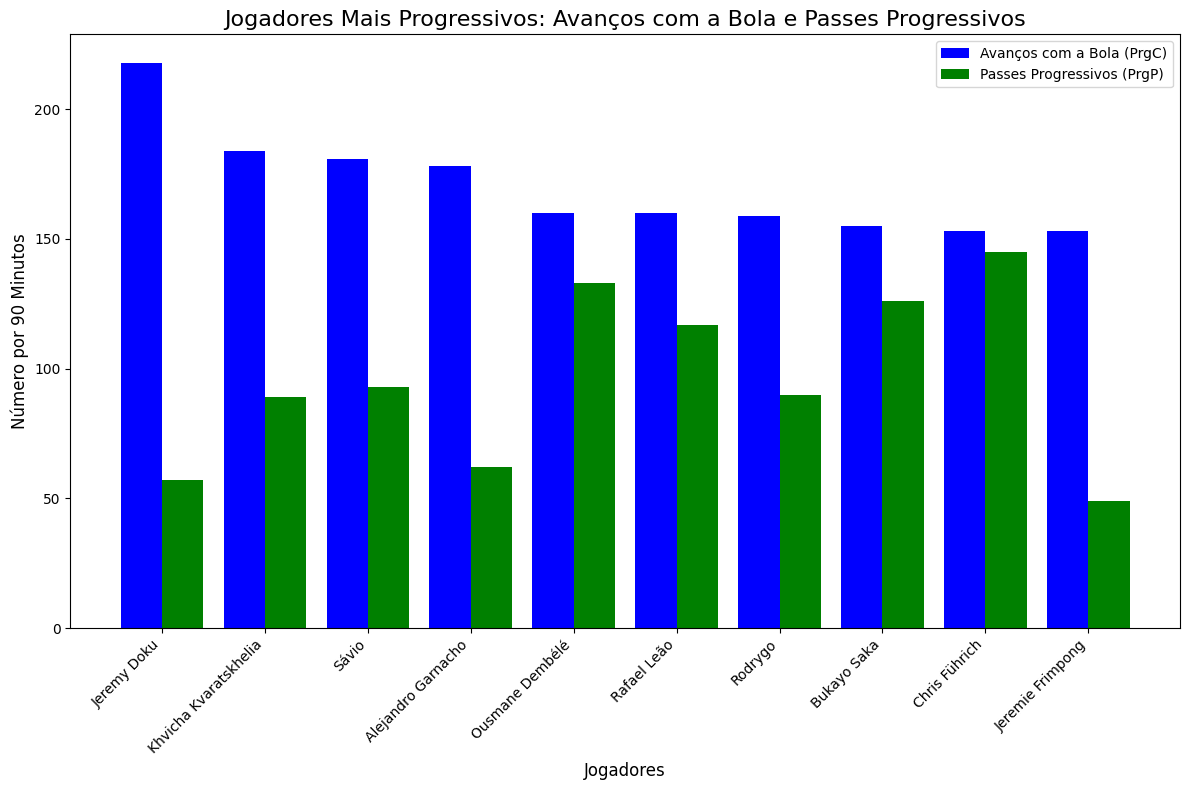

In [17]:
# Selecionar os 10 jogadores mais progressivos em termos de avanços e passes progressivos
top_10_progressive_players = top_progressive_players.head(10)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Largura das barras
bar_width = 0.4
indices = range(len(top_10_progressive_players))

# Criar as barras para avanços com a bola (PrgC)
plt.bar(indices, top_10_progressive_players['PrgC'], width=bar_width, color='blue', label='Avanços com a Bola (PrgC)')

# Criar as barras para passes progressivos (PrgP), deslocando-as à direita das barras de avanços com a bola
plt.bar([i + bar_width for i in indices], top_10_progressive_players['PrgP'], width=bar_width, color='green', label='Passes Progressivos (PrgP)')

# Adicionar títulos e rótulos
plt.title('Jogadores Mais Progressivos: Avanços com a Bola e Passes Progressivos', fontsize=16)
plt.xlabel('Jogadores', fontsize=12)
plt.ylabel('Número por 90 Minutos', fontsize=12)

# Rótulos no eixo X com os nomes dos jogadores
plt.xticks([i + bar_width / 2 for i in indices], top_10_progressive_players['Player'], rotation=45, ha='right')

# Exibir a legenda
plt.legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Disciplina: Jogadores com mais cartões

Nesta análise, queremos identificar os jogadores mais indisciplinados em termos de cartões amarelos (CrdY) e cartões vermelhos (CrdR). Podemos também fazer uma análise combinada para encontrar os jogadores que acumulam mais cartões no geral.

In [18]:
# Ordenando os jogadores pelos cartões amarelos (CrdY) e vermelhos (CrdR)
top_disciplined_players = top5_df[['Player', 'Squad', 'Pos', 'CrdY', 'CrdR']].sort_values(by=['CrdY', 'CrdR'], ascending=False)

# Exibir os 10 jogadores mais indisciplinados
top_10_disciplined_players = top_disciplined_players.head(10)

top_disciplined_players.head(10)

,Player,Squad,Pos,CrdY,CrdR
68,Iván Alejo,Cádiz,MF,17,0
1351,Dominik Kohr,Mainz 05,"DF,MF",15,1
2040,Leandro Paredes,Roma,MF,15,1
777,Ondrej Duda,Hellas Verona,MF,14,2
729,Djené,Getafe,"DF,MF",14,1
66,Rubén Alcaraz,Cádiz,MF,14,0
2190,Luca Ranieri,Fiorentina,DF,14,0
2808,Denis Zakaria,Monaco,"MF,DF",13,2
1448,Robin Le Normand,Real Sociedad,DF,13,0
2024,João Palhinha,Fulham,MF,13,0


<ipython-input-19-62327a50af7b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_disciplined_players['Player_Info'] = top_10_disciplined_players['Player'] + ' (' + top_10_disciplined_players['Squad'] + ', ' + top_10_disciplined_players['Pos'] + ')'


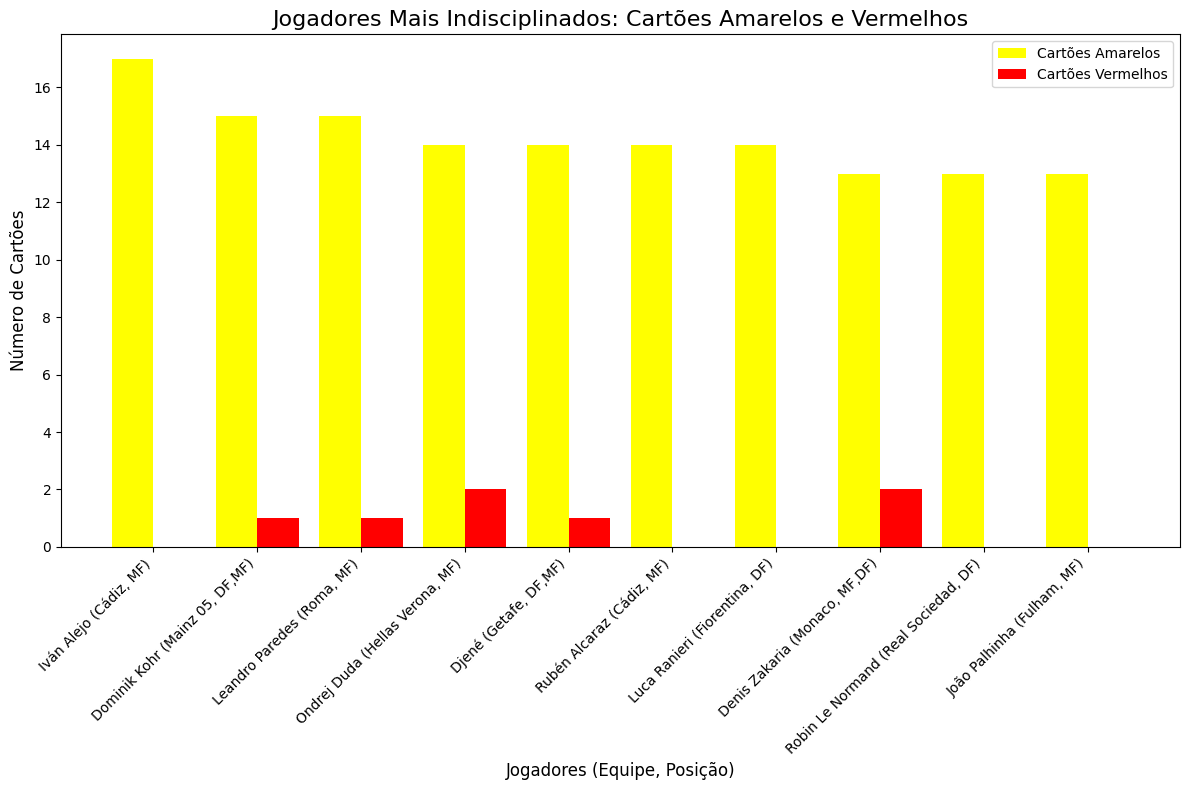

In [19]:
# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Largura das barras
bar_width = 0.4
indices = range(len(top_10_disciplined_players))

# Criar o gráfico de barras agrupadas
plt.bar(indices, top_10_disciplined_players['CrdY'], width=bar_width, color='yellow', label='Cartões Amarelos')
plt.bar([i + bar_width for i in indices], top_10_disciplined_players['CrdR'], width=bar_width, color='red', label='Cartões Vermelhos')

# Adicionar rótulos e título
plt.title('Jogadores Mais Indisciplinados: Cartões Amarelos e Vermelhos', fontsize=16)
plt.xlabel('Jogadores (Equipe, Posição)', fontsize=12)
plt.ylabel('Número de Cartões', fontsize=12)

# Criar a coluna Player_Info no DataFrame top_10_disciplined_players
top_10_disciplined_players['Player_Info'] = top_10_disciplined_players['Player'] + ' (' + top_10_disciplined_players['Squad'] + ', ' + top_10_disciplined_players['Pos'] + ')'

# Rótulos no eixo X (usando a coluna Player_Info recém-criada)
plt.xticks([i + bar_width/2 for i in indices], top_10_disciplined_players['Player_Info'], rotation=45, ha="right")

# Exibir a legenda
plt.legend()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

## A posição do jogador influência a sua displina?

Análise para identificar como a posição dos jogadores influencia a disciplina, medida pelo número de cartões amarelos (CrdY) e vermelhos (CrdR).

A ideia aqui é calcular a média de cartões por posição (por exemplo, defensores, meio-campistas, atacantes) e comparar como diferentes posições tendem a ser mais ou menos indisciplinadas.

In [20]:
# Agrupando os dados por posição e calculando as médias de cartões amarelos e vermelhos
discipline_by_position = top5_df.groupby('Pos').agg({
    'CrdY': 'mean',
    'CrdR': 'mean'
}).reset_index()

# Renomeando as colunas para facilitar a leitura
discipline_by_position.columns = ['Posição', 'Média Cartões Amarelos', 'Média Cartões Vermelhos']

# Exibir o resultado da média de cartões por posição
discipline_by_position


,Posição,Média Cartões Amarelos,Média Cartões Vermelhos
0,DF,3.31,0.17
1,"DF,FW",2.06,0.09
2,"DF,MF",2.87,0.14
3,FW,1.90,0.09
4,"FW,DF",1.57,0.04
5,"FW,MF",1.96,0.09
6,GK,1.04,0.06
7,MF,3.45,0.11
8,"MF,DF",2.86,0.11
9,"MF,FW",2.10,0.11


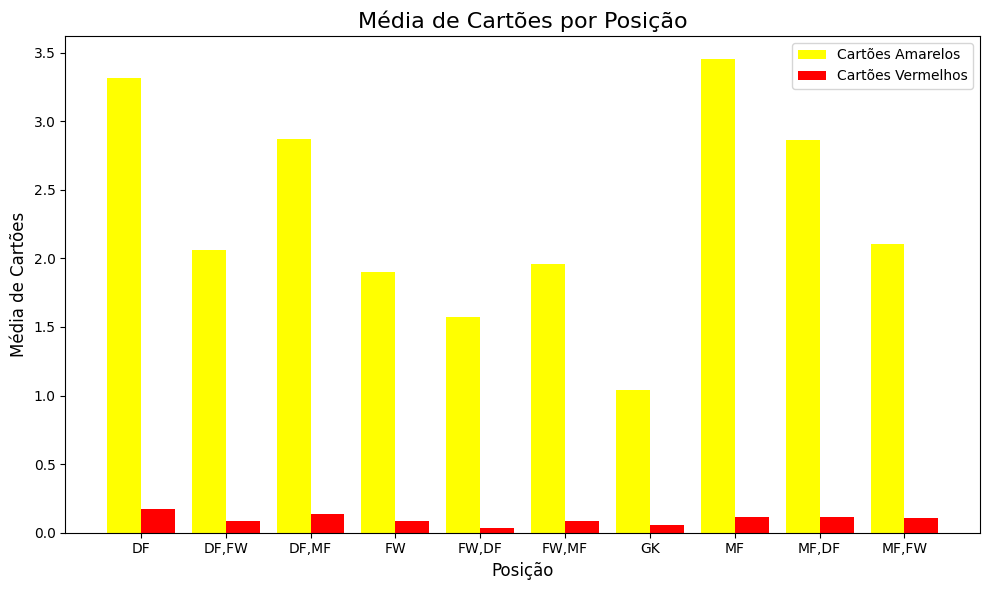

In [21]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Largura das barras
bar_width = 0.4
indices = range(len(discipline_by_position))

# Criar o gráfico de barras agrupadas
plt.bar(indices, discipline_by_position['Média Cartões Amarelos'], width=bar_width, color='yellow', label='Cartões Amarelos')
plt.bar([i + bar_width for i in indices], discipline_by_position['Média Cartões Vermelhos'], width=bar_width, color='red', label='Cartões Vermelhos')

# Adicionar rótulos e título
plt.title('Média de Cartões por Posição', fontsize=16)
plt.xlabel('Posição', fontsize=12)
plt.ylabel('Média de Cartões', fontsize=12)

# Rótulos no eixo X
plt.xticks([i + bar_width/2 for i in indices], discipline_by_position['Posição'])

# Exibir a legenda
plt.legend()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()


## A posição do jogador influência a sua displina?
## Verificando o desvio padrão

A posição do jogador influência a sua displina?

Análise para identificar como a posição dos jogadores influencia a disciplina, medida pelo número de cartões amarelos (CrdY) e vermelhos (CrdR).

A ideia aqui é calcular a média de cartões por posição (por exemplo, defensores, meio-campistas, atacantes) e comparar como diferentes posições tendem a ser mais ou menos indisciplinadas.

In [22]:
# Agrupando os dados por posição e calculando as médias de cartões amarelos e vermelhos
discipline_by_position = top5_df.groupby('Pos').agg({
    'CrdY': 'mean',
    'CrdR': 'mean'
}).reset_index()

# Renomeando as colunas para facilitar a leitura
discipline_by_position.columns = ['Posição', 'Média Cartões Amarelos', 'Média Cartões Vermelhos']

# Calculando o desvio padrão dos cartões amarelos e vermelhos por posição
discipline_std_by_position = top5_df.groupby('Pos').agg({
    'CrdY': 'std',
    'CrdR': 'std'
}).reset_index()

# Renomeando as colunas para facilitar a leitura
discipline_std_by_position.columns = ['Posição', 'Desvio Cartões Amarelos', 'Desvio Cartões Vermelhos']

# Unindo os dois DataFrames (médias e desvios) para facilitar o gráfico
discipline_by_position = discipline_by_position.merge(discipline_std_by_position, on='Posição')

# Exibir o resultado da média e desvio padrão de cartões por posição
discipline_by_position

,Posição,Média Cartões Amarelos,Média Cartões Vermelhos,Desvio Cartões Amarelos,Desvio Cartões Vermelhos
0,DF,3.31,0.17,2.73,0.42
1,"DF,FW",2.06,0.09,2.39,0.28
2,"DF,MF",2.87,0.14,2.95,0.35
3,FW,1.90,0.09,2.19,0.30
4,"FW,DF",1.57,0.04,2.03,0.19
5,"FW,MF",1.96,0.09,2.24,0.31
6,GK,1.04,0.06,1.28,0.26
7,MF,3.45,0.11,3.25,0.34
8,"MF,DF",2.86,0.11,2.88,0.35
9,"MF,FW",2.10,0.11,2.29,0.35


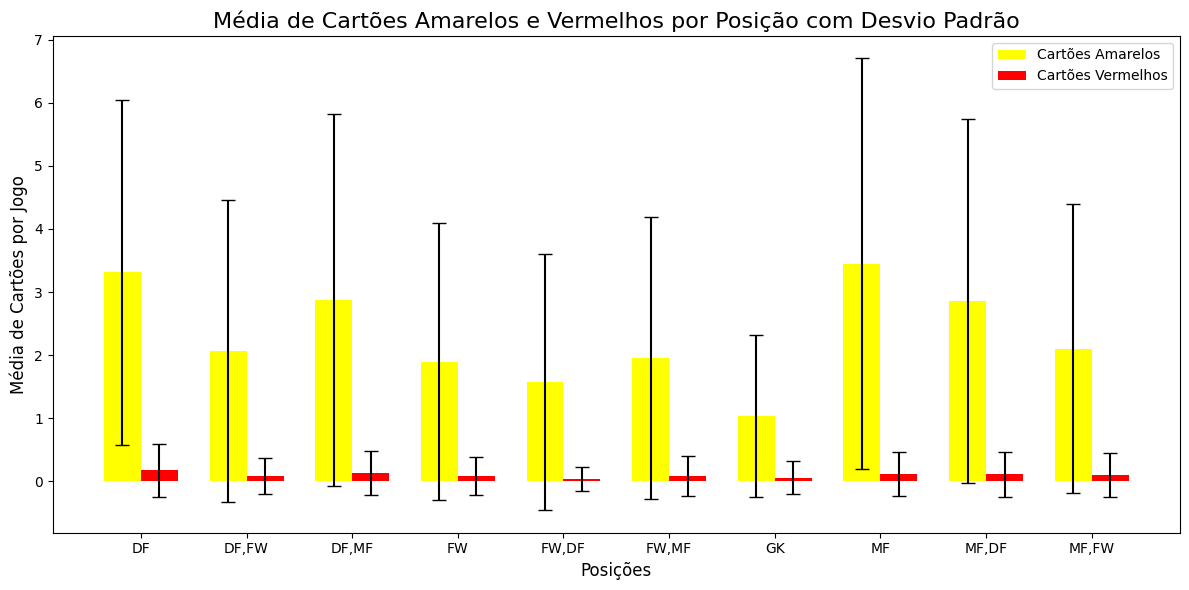

In [23]:
# Definir o tamanho da figura
plt.figure(figsize=(12, 6))

# Definir as categorias (posições)
positions = discipline_by_position['Posição']

# Definir as barras para cada tipo de cartão
bar_width = 0.35
indices = range(len(positions))

# Obter os dados
media_cartoes_amarelos = discipline_by_position['Média Cartões Amarelos']
media_cartoes_vermelhos = discipline_by_position['Média Cartões Vermelhos']
desvio_cartoes_amarelos = discipline_by_position['Desvio Cartões Amarelos']
desvio_cartoes_vermelhos = discipline_by_position['Desvio Cartões Vermelhos']

# Plotar as barras com barras de erro (desvio padrão)
plt.bar(indices, media_cartoes_amarelos, width=bar_width, yerr=desvio_cartoes_amarelos, label='Cartões Amarelos', color='yellow', capsize=5)
plt.bar([i + bar_width for i in indices], media_cartoes_vermelhos, width=bar_width, yerr=desvio_cartoes_vermelhos, label='Cartões Vermelhos', color='red', capsize=5)

# Adicionar rótulos e título
plt.xlabel('Posições', fontsize=12)
plt.ylabel('Média de Cartões por Jogo', fontsize=12)
plt.title('Média de Cartões Amarelos e Vermelhos por Posição com Desvio Padrão', fontsize=16)
plt.xticks([i + bar_width/2 for i in indices], positions)

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

## Jogadores Subvalorizados: Análise de Gols + Assistências vs. Tempo de Jogo

Nessa análise, comparamos jogadores que têm poucas partidas ou minutos jogados, mas que têm uma alta contribuição em termos de gols e assistências por 90 minutos (G+A_90).

Isso pode revelar jogadores que têm alto impacto apesar de jogarem menos tempo.

In [24]:
# Criar uma coluna de contribuição ofensiva total por 90 minutos (Gols + Assistências)
top5_df['Contribuição_Total'] = top5_df['G+A_90']

# Filtrar jogadores com menos de 1000 minutos jogados
underutilized_players = top5_df[top5_df['Min'] < 1000]

# Ordenar por maior contribuição total por 90 minutos
top_underutilized_players = underutilized_players[['Player', 'Squad', 'Pos', 'Min', 'G+A_90']].sort_values(by='G+A_90', ascending=False)

# Exibir os 10 jogadores com maior impacto e menos tempo de jogo
top_underutilized_players.head(10)


,Player,Squad,Pos,Min,G+A_90
1397,Christian Kühlwetter,Heidenheim,MF,8,11.25
409,Rareș-Cătălin Burnete,Lecce,FW,8,11.25
682,Federico Di Francesco,Lecce,"FW,MF",15,6.00
2030,Miloš Pantović,Union Berlin,MF,15,6.00
1688,Noah Mbamba,Leverkusen,MF,16,5.63
513,Timothy Chandler,Eint Frankfurt,"MF,DF",18,5.00
2627,Chaka Traorè,Milan,FW,20,4.50
1694,Nolan Mbemba,Le Havre,MF,22,4.09
582,Oscar Cortés,Lens,"FW,MF",44,4.09
622,Trévis Dago,Lille,"FW,MF",23,3.91


## Gráfico dos jogadores subvalorizados

São aqueles jogadores com menos de 1000 minutos jogados, mas com alta contribuição ofensiva.

O gráfico de forma que ele mostre, além da contribuição ofensiva por 90 minutos (G+A_90), também os minutos jogados (Min).

Ideia:
- Barras Duplas: Exibir as barras agrupadas onde uma barra representará a contribuição ofensiva por 90 minutos (G+A_90) e outra barra representará os minutos jogados (Min). Isso dará uma ideia de quão eficazes são esses jogadores em relação ao seu tempo em campo.
- Como estamos comparando minutos jogados com uma métrica de contribuição ofensiva, que têm escalas diferentes, podemos usar dois eixos Y (um para cada métrica).

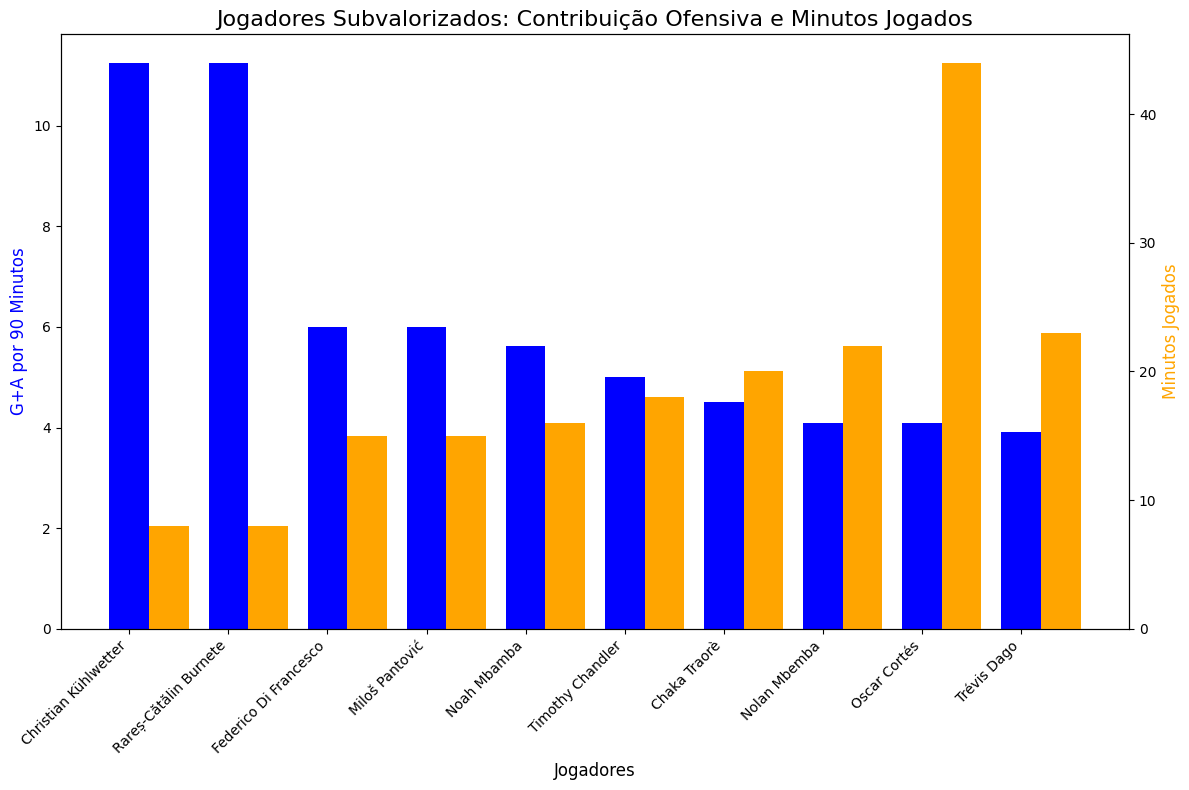

In [25]:
# Selecionar os 10 jogadores subvalorizados com menos de 1000 minutos jogados
top_10_underutilized_players = top_underutilized_players.head(10)

# Definir o tamanho da figura
fig, ax1 = plt.subplots(figsize=(12, 8))

# Largura das barras
bar_width = 0.4
indices = range(len(top_10_underutilized_players))

# Criar as barras para G+A por 90 minutos
ax1.bar(indices, top_10_underutilized_players['G+A_90'], width=bar_width, color='blue', label='Contribuição Ofensiva (G+A por 90 Minutos)')
ax1.set_xlabel('Jogadores', fontsize=12)
ax1.set_ylabel('G+A por 90 Minutos', fontsize=12, color='blue')
ax1.set_title('Jogadores Subvalorizados: Contribuição Ofensiva e Minutos Jogados', fontsize=16)

# Adicionar rótulos para os jogadores no eixo X
ax1.set_xticks([i for i in indices])
ax1.set_xticklabels(top_10_underutilized_players['Player'], rotation=45, ha='right')

# Criar um segundo eixo Y para os minutos jogados
ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in indices], top_10_underutilized_players['Min'], width=bar_width, color='orange', label='Minutos Jogados')
ax2.set_ylabel('Minutos Jogados', fontsize=12, color='orange')

# Adicionar a legenda
fig.tight_layout()
plt.show()


# Quem são os bons finalizadores?

Podemos identificar os jogadores que são bons finalizadores comparando seus gols reais marcados (Gls_90) com os gols esperados (xG_90).

A diferença entre essas duas métricas ajuda a revelar jogadores que estão superando suas expectativas de finalização.


In [ ]:
# Criar uma nova coluna que calcula a diferença entre gols reais e gols esperados
top5_df['Diferença_Gls_xG'] = top5_df['Gls_90'] - top5_df['xG_90']

# Ordenar os jogadores pela diferença (Gols reais - Gols esperados)
top_finishers = top5_df[['Player', 'Squad', 'Pos', 'Gls_90', 'xG_90', 'Diferença_Gls_xG']].sort_values(by='Diferença_Gls_xG', ascending=False)

# Exibir os 10 jogadores que mais superaram suas expectativas de gols
top_finishers.head(10)


,Player,Squad,Pos,Gls_90,xG_90,Diferença_Gls_xG
682,Federico Di Francesco,Lecce,"FW,MF",6.00,0.53,5.47
2627,Chaka Traorè,Milan,FW,4.50,0.35,4.15
1694,Nolan Mbemba,Le Havre,MF,4.09,0.17,3.92
2369,Zanos Savva,Torino,"DF,MF",3.21,0.51,2.70
1850,Kingstone Mutandwa,Cagliari,"FW,MF",2.31,0.17,2.14
788,George Earthy,West Ham,FW,2.65,0.82,1.83
1911,Lukas Nmecha,Wolfsburg,FW,2.14,0.31,1.83
2030,Miloš Pantović,Union Berlin,MF,6.00,4.55,1.45
2683,Alejo Véliz,Tottenham,FW,1.80,0.45,1.35
582,Oscar Cortés,Lens,"FW,MF",2.05,0.93,1.12


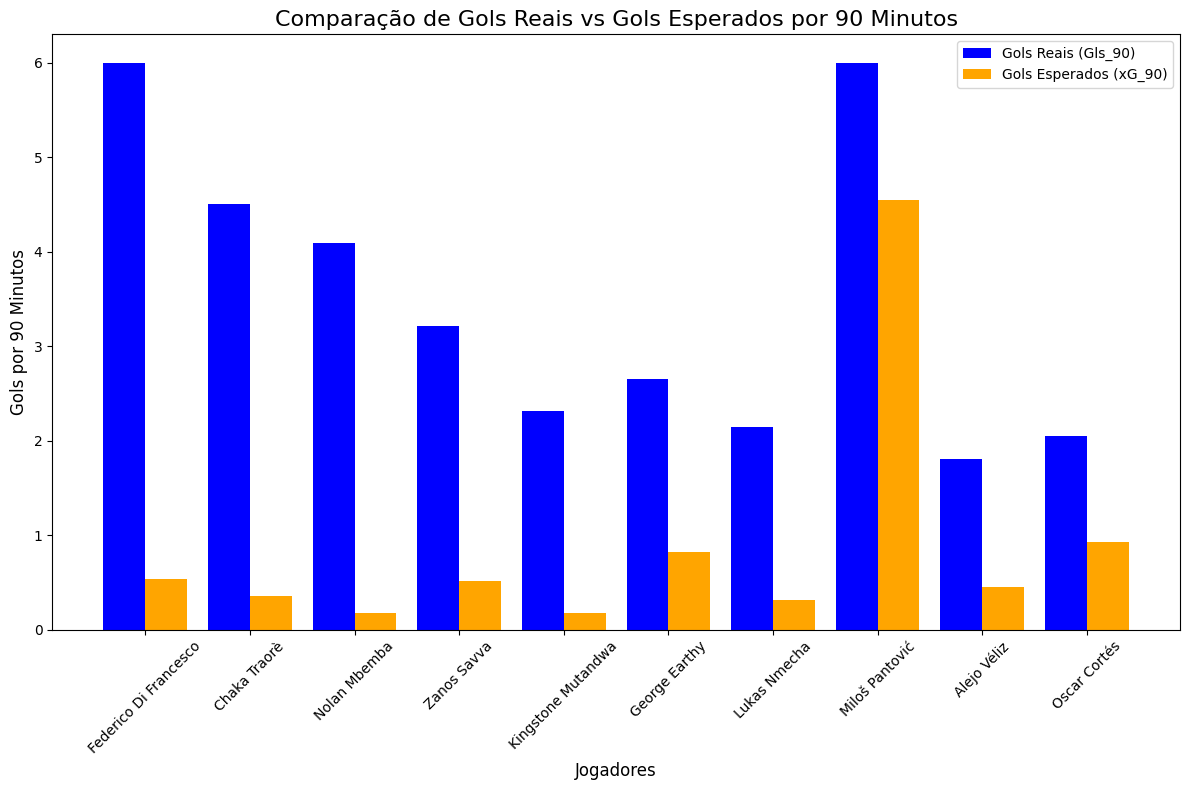

In [ ]:
# Selecionar os 10 melhores finalizadores
top_10_finishers = top_finishers.head(10)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Definir a largura das barras
bar_width = 0.4
indices = range(len(top_10_finishers))

# Criar o gráfico de barras agrupadas (Gols Reais vs Gols Esperados)
plt.bar(indices, top_10_finishers['Gls_90'], width=bar_width, color='blue', label='Gols Reais (Gls_90)')
plt.bar([i + bar_width for i in indices], top_10_finishers['xG_90'], width=bar_width, color='orange', label='Gols Esperados (xG_90)')

# Adicionar títulos e rótulos
plt.title('Comparação de Gols Reais vs Gols Esperados por 90 Minutos', fontsize=16)
plt.xlabel('Jogadores', fontsize=12)
plt.ylabel('Gols por 90 Minutos', fontsize=12)

# Rótulos no eixo X (nomes dos jogadores)
plt.xticks([i + bar_width / 2 for i in indices], top_10_finishers['Player'], rotation=45)

# Exibir a legenda
plt.legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Correlação entre xG e Desempenho Real: Comparar Gols Marcados com Gols Esperados (xG)

Analisar se os jogadores estão marcando mais ou menos do que o esperado, com base nas métricas de Gols Marcados (Gls_90) versus Gols Esperados (xG_90).

Isso pode revelar jogadores que são excepcionalmente bons finalizadores ou que têm sorte acima da média.

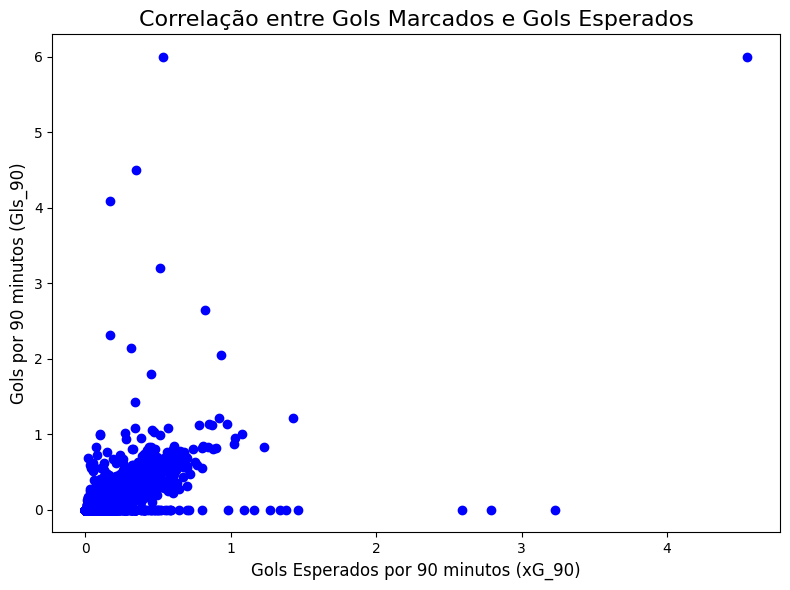

In [ ]:
# Plotar gráfico de dispersão entre Gols por 90 min (reais) e Gols Esperados por 90 min
plt.figure(figsize=(8, 6))
plt.scatter(top5_df['xG_90'], top5_df['Gls_90'], color='blue')

# Adicionar rótulos e título
plt.title('Correlação entre Gols Marcados e Gols Esperados', fontsize=16)
plt.xlabel('Gols Esperados por 90 minutos (xG_90)', fontsize=12)
plt.ylabel('Gols por 90 minutos (Gls_90)', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


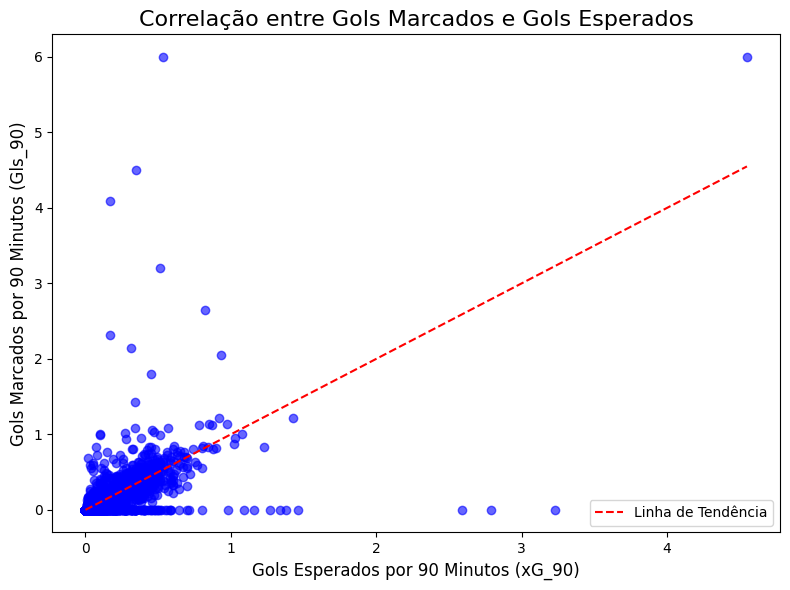

In [ ]:
# Definir o tamanho da figura
plt.figure(figsize=(8, 6))

# Criar gráfico de dispersão entre Gols por 90 min e Gols Esperados por 90 min
plt.scatter(top5_df['xG_90'], top5_df['Gls_90'], color='blue', alpha=0.6)

# Adicionar uma linha de tendência para visualização
plt.plot([top5_df['xG_90'].min(), top5_df['xG_90'].max()],
         [top5_df['xG_90'].min(), top5_df['xG_90'].max()],
         color='red', linestyle='--', label='Linha de Tendência')

# Adicionar rótulos e título
plt.title('Correlação entre Gols Marcados e Gols Esperados', fontsize=16)
plt.xlabel('Gols Esperados por 90 Minutos (xG_90)', fontsize=12)
plt.ylabel('Gols Marcados por 90 Minutos (Gls_90)', fontsize=12)

# Exibir a legenda e o gráfico
plt.legend()
plt.tight_layout()
plt.show()


## Análise de Eficácia dos Passes Progressivos e Conduções Progressivas por Posição

Para entender qual posição contribui mais em termos de movimentação e passes progressivos, podemos calcular a eficácia de passes progressivos e conduções progressivas, agrupando por posição.

In [ ]:
# Agrupando por posição e calculando a média de Passes Progressivos (PrgP) e Conduções Progressivas (PrgC)
progressive_by_position = top5_df.groupby('Pos').agg({
    'PrgC': 'mean',
    'PrgP': 'mean'
}).reset_index()

# Exibir os resultados
progressive_by_position


,Pos,PrgC,PrgP
0,DF,19.44,58.26
1,"DF,FW",23.96,30.23
2,"DF,MF",23.48,46.89
3,FW,24.61,25.40
4,"FW,DF",19.54,20.11
5,"FW,MF",33.19,34.12
6,GK,0.02,0.76
7,MF,20.09,71.11
8,"MF,DF",20.07,51.88
9,"MF,FW",28.40,45.93


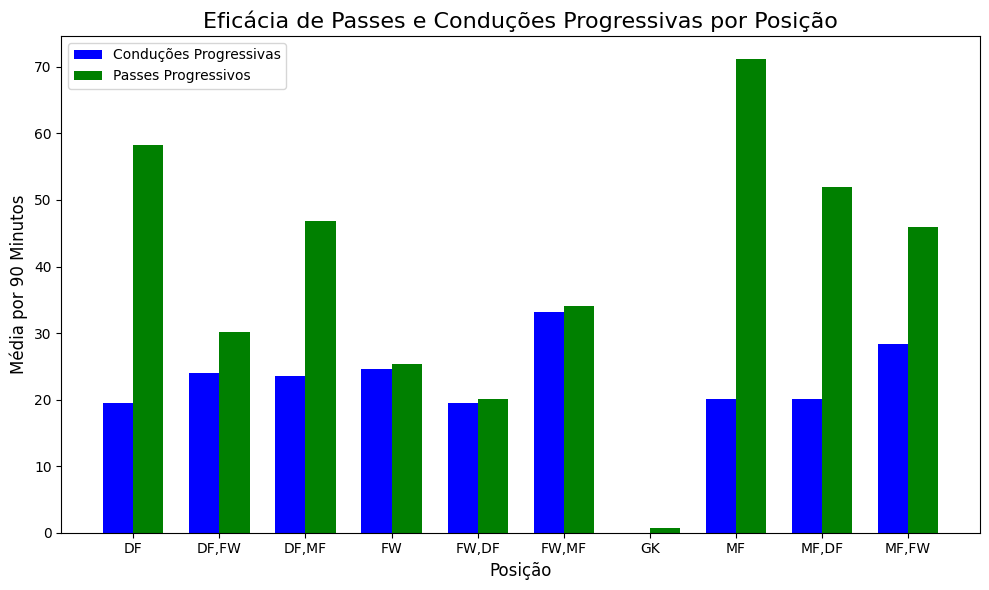

In [ ]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Largura das barras
bar_width = 0.35
indices = range(len(progressive_by_position))

# Criar o gráfico de barras agrupadas
plt.bar(indices, progressive_by_position['PrgC'], width=bar_width, color='blue', label='Conduções Progressivas')
plt.bar([i + bar_width for i in indices], progressive_by_position['PrgP'], width=bar_width, color='green', label='Passes Progressivos')

# Adicionar rótulos e título
plt.title('Eficácia de Passes e Conduções Progressivas por Posição', fontsize=16)
plt.xlabel('Posição', fontsize=12)
plt.ylabel('Média por 90 Minutos', fontsize=12)

# Rótulos no eixo X
plt.xticks([i + bar_width / 2 for i in indices], progressive_by_position['Pos'])

# Exibir a legenda e o gráfico
plt.legend()
plt.tight_layout()
plt.show()


## Jogadores mais Eficientes em Contribuição Ofensiva por Equipe
Agrupar jogadores por equipe (Squad) e calcular a contribuição ofensiva média de cada time (Gols + Assistências por 90 minutos). Isso ajuda a identificar quais times dependem mais de contribuições individuais e quais têm uma distribuição de talento mais equilibrada.

In [ ]:
# Agrupar jogadores por equipe e calcular a média de G+A_90 (Gols + Assistências por 90 minutos)
team_contribution = top5_df.groupby('Squad').agg({
    'G+A_90': 'mean'
}).sort_values(by='G+A_90', ascending=False)

# Exibir os 10 times com maior contribuição ofensiva média por jogador
team_contribution.head(10)


,G+A_90
Squad,
Lecce,0.80
Heidenheim,0.71
Leverkusen,0.64
Inter,0.39
Eint Frankfurt,0.37
Manchester City,0.37
Union Berlin,0.36
Milan,0.33
Tottenham,0.33


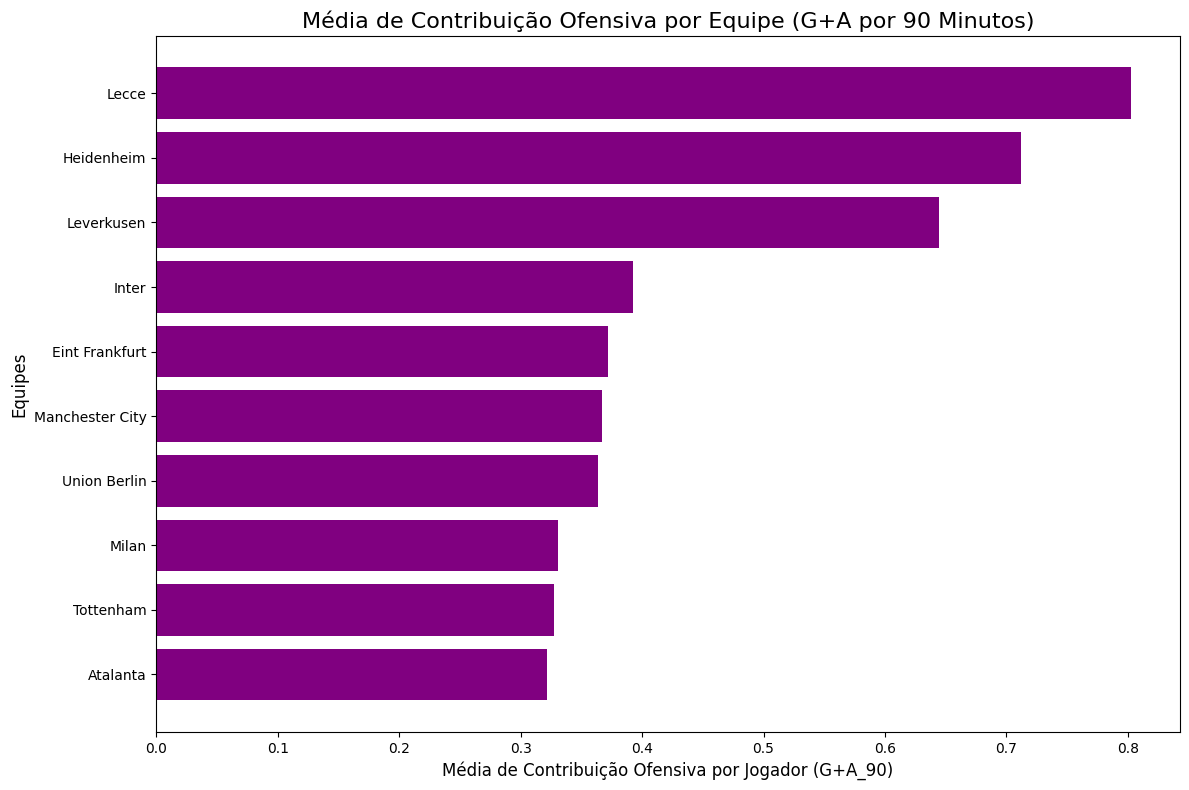

In [ ]:
# Selecionar os 10 times com maior contribuição ofensiva média
top_10_team_contribution = team_contribution.head(10)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras horizontais
plt.barh(top_10_team_contribution.index, top_10_team_contribution['G+A_90'], color='purple')

# Adicionar rótulos e título
plt.title('Média de Contribuição Ofensiva por Equipe (G+A por 90 Minutos)', fontsize=16)
plt.xlabel('Média de Contribuição Ofensiva por Jogador (G+A_90)', fontsize=12)
plt.ylabel('Equipes', fontsize=12)

# Inverter a ordem do eixo Y para o maior valor no topo
plt.gca().invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()


# Jogadores mais eficientes em contribuição ofensiva dentro das equipes

Identificar os jogadores com maior G+A por 90 minutos dentro dessas equipes que apareceram no ranking das equipes mais eficientes.

Criar um gráfico de barras que mostra as equipes e, ao mesmo tempo, exibe os jogadores com as melhores contribuições ofensivas.


In [ ]:
# Filtrar os jogadores das 10 melhores equipes
top_teams = team_contribution.head(10).index
top_players_from_top_teams = top5_df[top5_df['Squad'].isin(top_teams)]

# Ordenar os jogadores com base em sua contribuição ofensiva (G+A_90)
top_contributing_players = top_players_from_top_teams[['Player', 'Squad', 'Pos', 'G+A_90']].sort_values(by='G+A_90', ascending=False)

# Exibir os jogadores com maior contribuição ofensiva dentro das melhores equipes
top_contributing_players.head(10)


,Player,Squad,Pos,G+A_90
409,Rareș-Cătălin Burnete,Lecce,FW,11.25
1397,Christian Kühlwetter,Heidenheim,MF,11.25
682,Federico Di Francesco,Lecce,"FW,MF",6.00
2030,Miloš Pantović,Union Berlin,MF,6.00
1688,Noah Mbamba,Leverkusen,MF,5.63
513,Timothy Chandler,Eint Frankfurt,"MF,DF",5.00
2627,Chaka Traorè,Milan,FW,4.50
2412,Stefano Sensi,Inter,MF,1.96
2683,Alejo Véliz,Tottenham,FW,1.80
999,Sergio Gómez,Manchester City,"FW,MF",1.70


In [ ]:
# Criar um índice de desempenho para cada jogador com base nas métricas
top5_df['Índice_Desempenho'] = (
    0.5 * top5_df['G+A_90'] +
    0.25 * top5_df['xG+xAG_90'] +
    0.15 * top5_df['PrgP'] +
    0.10 * top5_df['PrgC']
)

# Agrupar os jogadores por liga e ordenar pelo índice de desempenho
best_players_by_league = top5_df.groupby('Comp').apply(
    lambda x: x[['Player', 'Squad', 'Pos', 'G+A_90', 'xG+xAG_90', 'PrgP', 'PrgC', 'Índice_Desempenho']].sort_values(by='Índice_Desempenho', ascending=False).head(5)
).reset_index(drop=True)

# Exibir os 5 melhores jogadores de cada liga
best_players_by_league


C:\Users\jaque\AppData\Local\Temp\ipykernel_1828\614263078.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_players_by_league = top5_df.groupby('Comp').apply(


,Player,Squad,Pos,G+A_90,xG+xAG_90,PrgP,PrgC,Índice_Desempenho
0,Granit Xhaka,Leverkusen,MF,0.10,0.15,392.0,60.0,64.89
1,Kevin Stöger,Bochum,MF,0.57,0.54,283.0,81.0,50.97
2,Florian Wirtz,Leverkusen,MF,0.83,0.62,224.0,138.0,47.97
3,Xavi Simons,RB Leipzig,MF,0.64,0.61,187.0,151.0,43.62
4,Xaver Schlager,RB Leipzig,MF,0.18,0.13,230.0,73.0,41.92
...,...,...,...,...,...,...,...,...
20,Giovanni Di Lorenzo,Napoli,DF,0.19,0.22,304.0,95.0,55.25
21,Nicolò Barella,Inter,MF,0.16,0.27,278.0,68.0,48.65
22,Matìas Soulé,Frosinone,"FW,MF",0.40,0.49,198.0,115.0,41.52
23,Luis Alberto,Lazio,MF,0.47,0.37,212.0,83.0,40.43


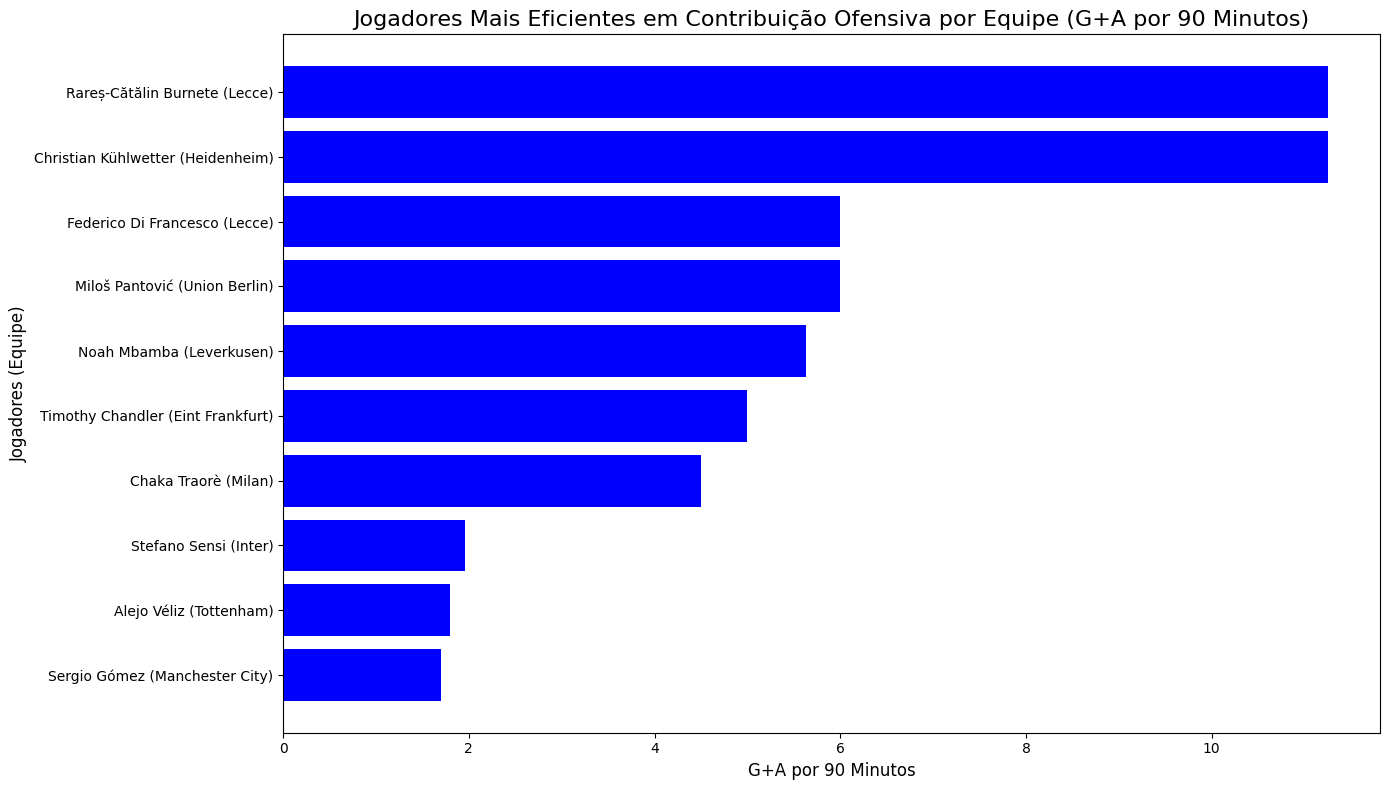

In [ ]:
# Selecionar os 10 melhores jogadores
top_10_players = top_contributing_players.head(10)

# Definir o tamanho da figura
plt.figure(figsize=(14, 8))

# Criar o gráfico de barras
plt.barh(top_10_players['Player'] + ' (' + top_10_players['Squad'] + ')', top_10_players['G+A_90'], color='blue')

# Adicionar títulos e rótulos
plt.title('Jogadores Mais Eficientes em Contribuição Ofensiva por Equipe (G+A por 90 Minutos)', fontsize=16)
plt.xlabel('G+A por 90 Minutos', fontsize=12)
plt.ylabel('Jogadores (Equipe)', fontsize=12)

# Inverter a ordem do eixo Y para o maior valor no topo
plt.gca().invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Jogadores Consistentes: Análise de Desempenho ao Longo do Tempo

Verificar quais jogadores mantêm um desempenho consistente ao longo das partidas.

Isso pode ser feito verificando os minutos jogados (Min) e a contribuição ofensiva (gols e assistências por 90 minutos) ao longo do tempo.

Foco em jogadores que jogaram muitas partidas, mas ainda têm uma alta contribuição por 90 minutos.


In [ ]:
# Filtrar jogadores com mais de 2000 minutos jogados
consistent_players = top5_df[top5_df['Min'] > 2000]

# Ordenar pelo índice de desempenho e exibir os jogadores mais consistentes
top_consistent_players = consistent_players[['Player', 'Squad', 'Pos', 'Min', 'G+A_90', 'Índice_Desempenho']].sort_values(by='Índice_Desempenho', ascending=False)

# Exibir os 10 jogadores mais consistentes
top_consistent_players.head(10)


,Player,Squad,Pos,Min,G+A_90,Índice_Desempenho
2789,Granit Xhaka,Leverkusen,MF,2821,0.10,64.89
2251,Rodri,Manchester City,MF,2931,0.52,64.32
2848,Martin Ødegaard,Arsenal,MF,3091,0.52,61.09
685,Giovanni Di Lorenzo,Napoli,DF,3234,0.19,55.25
1040,Pascal Groß,Brighton,"MF,DF",3114,0.40,53.91
861,Bruno Fernandes,Manchester Utd,"MF,FW",3118,0.52,53.57
2511,Kevin Stöger,Bochum,MF,2668,0.57,50.97
937,Aleix García,Girona,MF,3199,0.25,50.08
454,Maxence Caqueret,Lyon,MF,3022,0.12,50.02
2225,Declan Rice,Arsenal,MF,3225,0.42,49.47


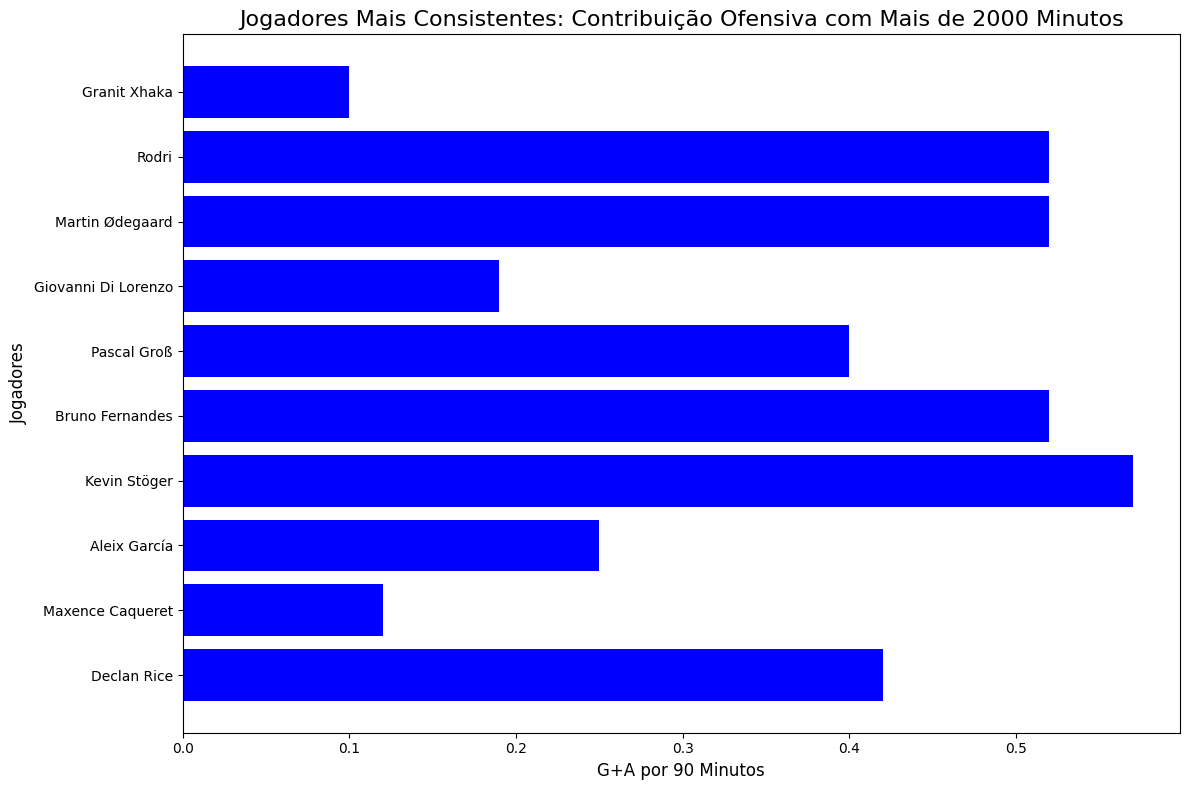

In [ ]:
# Selecionar os 10 jogadores mais consistentes
top_10_consistent_players = top_consistent_players.head(10)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar gráfico de barras horizontais para os jogadores mais consistentes
plt.barh(top_10_consistent_players['Player'], top_10_consistent_players['G+A_90'], color='blue')

# Adicionar rótulos e título
plt.title('Jogadores Mais Consistentes: Contribuição Ofensiva com Mais de 2000 Minutos', fontsize=16)
plt.xlabel('G+A por 90 Minutos', fontsize=12)
plt.ylabel('Jogadores', fontsize=12)

# Inverter a ordem do eixo Y
plt.gca().invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Equipes com Maior Dependência de Jogadores-Chave

Analisar se algum time depende fortemente de poucos jogadores para a contribuição ofensiva (gols e assistências).

Isso pode ser feito somando a contribuição ofensiva de cada jogador por time e verificando o quanto um ou dois jogadores representam dessa soma.

In [ ]:
# Agrupar por time e calcular a contribuição total de G+A_90 de cada time
team_offensive_contribution = top5_df.groupby('Squad').agg({
    'G+A_90': 'sum',
    'Player': 'count'
}).reset_index()

# Verificar a contribuição dos 3 jogadores com maior G+A_90 para cada time
top_players_per_team = top5_df.groupby('Squad').apply(
    lambda x: x[['Player', 'G+A_90']].sort_values(by='G+A_90', ascending=False).head(3).sum()
).reset_index()

# Comparar a contribuição total do time com os 3 melhores jogadores
team_dependency = pd.merge(team_offensive_contribution, top_players_per_team, on='Squad')
team_dependency['Dependência (%)'] = (team_dependency['G+A_90_y'] / team_dependency['G+A_90_x']) * 100

# Exibir as equipes com maior dependência de jogadores-chave
team_dependency[['Squad', 'G+A_90_x', 'G+A_90_y', 'Dependência (%)']].sort_values(by='Dependência (%)', ascending=False).head(10)


C:\Users\jaque\AppData\Local\Temp\ipykernel_1828\180973436.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_players_per_team = top5_df.groupby('Squad').apply(


,Squad,G+A_90_x,G+A_90_y,Dependência (%)
47,Lecce,20.87,18.15,86.97
38,Heidenheim,15.67,12.50,79.77
85,Torino,6.40,4.43,69.22
89,Union Berlin,10.90,7.38,67.71
50,Lille,7.73,5.18,67.01
48,Lens,8.37,5.44,64.99
46,Le Havre,7.83,4.95,63.22
93,West Ham,7.03,4.11,58.46
82,Sheffield Utd,2.60,1.51,58.08
26,Eint Frankfurt,12.65,7.11,56.21


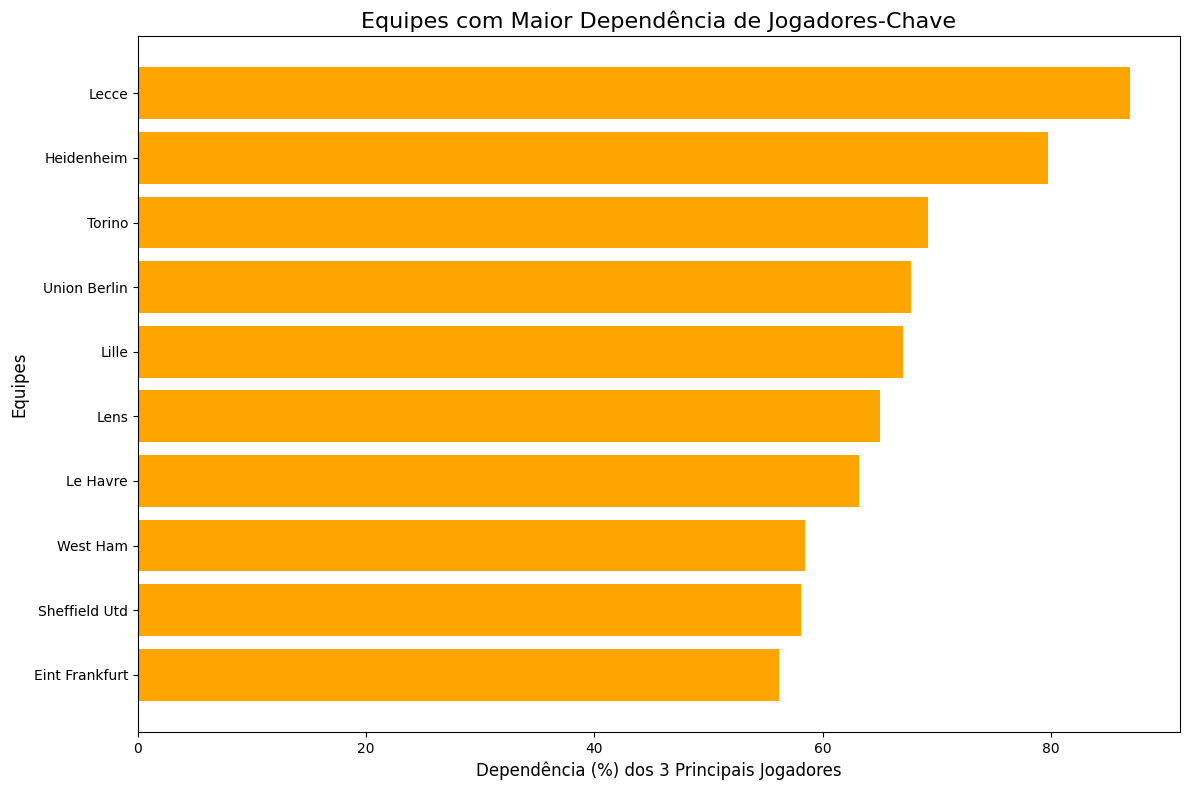

In [ ]:
# Selecionar as 10 equipes com maior dependência dos 3 melhores jogadores
top_10_team_dependency = team_dependency.sort_values(by='Dependência (%)', ascending=False).head(10)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar gráfico de barras horizontais para a dependência dos times em relação aos seus 3 melhores jogadores
plt.barh(top_10_team_dependency['Squad'], top_10_team_dependency['Dependência (%)'], color='orange')

# Adicionar rótulos e título
plt.title('Equipes com Maior Dependência de Jogadores-Chave', fontsize=16)
plt.xlabel('Dependência (%) dos 3 Principais Jogadores', fontsize=12)
plt.ylabel('Equipes', fontsize=12)

# Inverter a ordem do eixo Y
plt.gca().invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Jogadores Mais Eficientes por Minuto: Alta Contribuição com Pouco Tempo de Jogo

Focar nos jogadores que jogaram pouco (menos de 1000 minutos) mas ainda têm uma contribuição ofensiva muito alta, indicando que eles são extremamente eficientes quando estão em campo.

In [ ]:
# Filtrar jogadores com menos de 1000 minutos jogados
efficient_players = top5_df[top5_df['Min'] < 1000]

# Ordenar por G+A_90 para encontrar os jogadores mais eficientes
top_efficient_players = efficient_players[['Player', 'Squad', 'Min', 'G+A_90', 'Índice_Desempenho']].sort_values(by='G+A_90', ascending=False)

# Exibir os 10 jogadores mais eficientes por minuto
top_efficient_players.head(10)


,Player,Squad,Min,G+A_90,Índice_Desempenho
1397,Christian Kühlwetter,Heidenheim,8,11.25,7.44
409,Rareș-Cătălin Burnete,Lecce,8,11.25,5.80
682,Federico Di Francesco,Lecce,15,6.00,3.38
2030,Miloš Pantović,Union Berlin,15,6.00,4.24
1688,Noah Mbamba,Leverkusen,16,5.63,4.04
513,Timothy Chandler,Eint Frankfurt,18,5.00,3.62
2627,Chaka Traorè,Milan,20,4.50,2.54
582,Oscar Cortés,Lens,44,4.09,3.03
1694,Nolan Mbemba,Le Havre,22,4.09,2.84
622,Trévis Dago,Lille,23,3.91,2.50


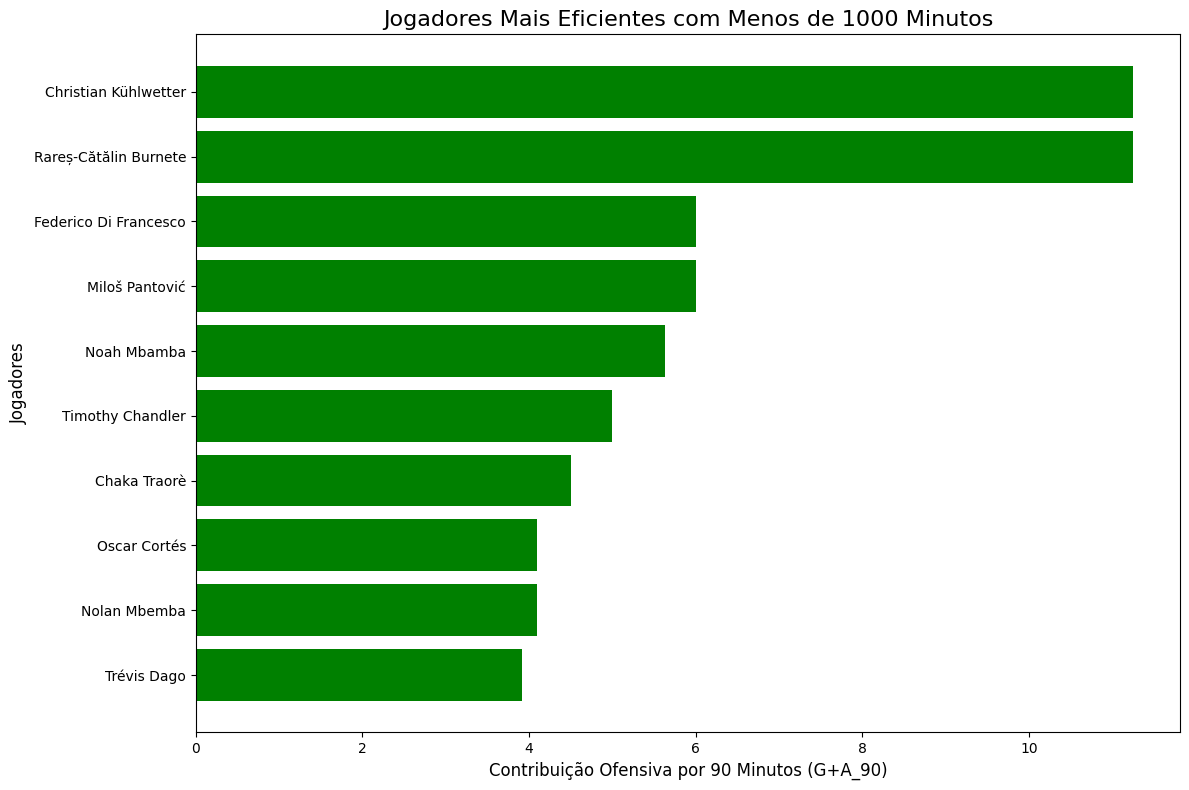

In [ ]:
# Selecionar os 10 jogadores mais eficientes com menos de 1000 minutos jogados
top_10_efficient_players = top_efficient_players.head(10)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar gráfico de barras horizontais para os jogadores mais eficientes
plt.barh(top_10_efficient_players['Player'], top_10_efficient_players['G+A_90'], color='green')

# Adicionar rótulos e título
plt.title('Jogadores Mais Eficientes com Menos de 1000 Minutos', fontsize=16)
plt.xlabel('Contribuição Ofensiva por 90 Minutos (G+A_90)', fontsize=12)
plt.ylabel('Jogadores', fontsize=12)

# Inverter a ordem do eixo Y
plt.gca().invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Comparação de Ligas: Contribuição Média por Liga

Comparar o desempenho médio dos jogadores em diferentes ligas, verificando métricas como G+A por 90 minutos, passes progressivos, conduções progressivas, etc.
Isso ajuda a identificar ligas mais ofensivas, técnicas ou defensivas.

Isso mostra como cada liga se comporta em termos de contribuição ofensiva e criação de jogadas, comparando ligas como Premier League, Bundesliga, La Liga, Serie A, etc.

In [ ]:
# Agrupar por liga e calcular a média de G+A_90, PrgC e PrgP por liga
league_comparison = top5_df.groupby('Comp').agg({
    'G+A_90': 'mean',
    'PrgC': 'mean',
    'PrgP': 'mean'
}).reset_index()

# Exibir a comparação entre ligas
league_comparison.sort_values(by='G+A_90', ascending=False)


,Comp,G+A_90,PrgC,PrgP
0,de Bundesliga,0.27,20.54,46.96
4,it Serie A,0.22,21.06,44.19
1,eng Premier League,0.22,24.65,50.58
3,fr Ligue 1,0.21,20.04,46.81
2,es La Liga,0.17,20.96,46.10


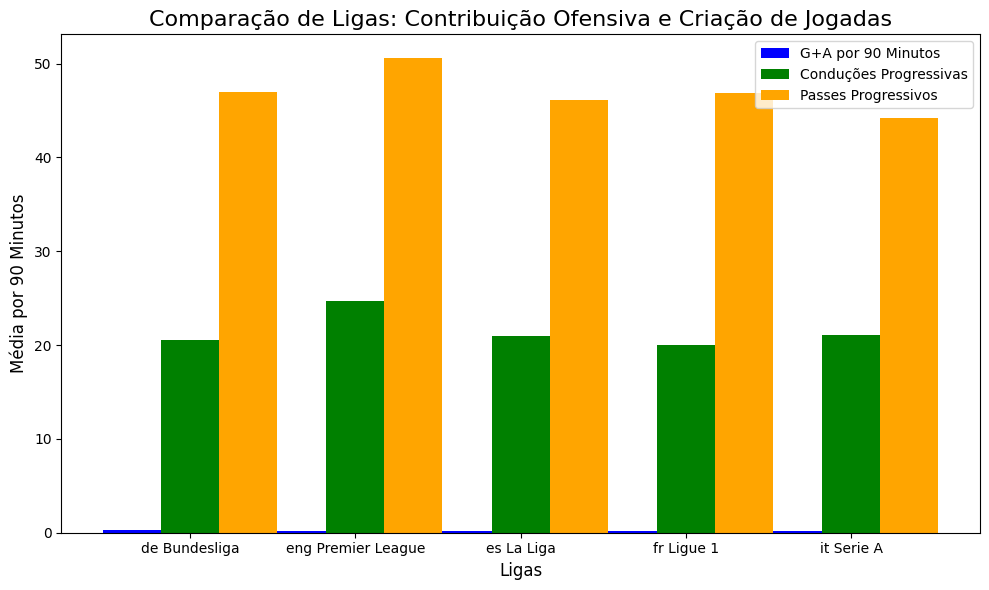

In [ ]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Largura das barras
bar_width = 0.35
indices = range(len(league_comparison))

# Criar gráfico de barras agrupadas para G+A_90, PrgC e PrgP por liga
plt.bar(indices, league_comparison['G+A_90'], width=bar_width, color='blue', label='G+A por 90 Minutos')
plt.bar([i + bar_width for i in indices], league_comparison['PrgC'], width=bar_width, color='green', label='Conduções Progressivas')
plt.bar([i + 2 * bar_width for i in indices], league_comparison['PrgP'], width=bar_width, color='orange', label='Passes Progressivos')

# Adicionar rótulos e título
plt.title('Comparação de Ligas: Contribuição Ofensiva e Criação de Jogadas', fontsize=16)
plt.xlabel('Ligas', fontsize=12)
plt.ylabel('Média por 90 Minutos', fontsize=12)

# Rótulos no eixo X
plt.xticks([i + bar_width for i in indices], league_comparison['Comp'])

# Exibir a legenda e o gráfico
plt.legend()
plt.tight_layout()
plt.show()


## Desempenho das equipes (Squads)

Podemos analisar o desempenho das equipes (Squads) com base em várias métricas como:

- Contribuição ofensiva: Usando a soma de Gols + Assistências por 90 minutos (G+A_90).
- Gols esperados + Assistências esperadas: Usando a métrica xG+xAG_90.
- Média de progressões: Passes progressivos (PrgP) e conduções progressivas (PrgC).

In [ ]:
# Agrupando os dados por Squad e calculando a média de G+A_90, xG+xAG_90, PrgC, e PrgP
team_performance = top5_df.groupby('Squad').agg({
    'G+A_90': 'mean',
    'xG+xAG_90': 'mean',
    'PrgC': 'mean',
    'PrgP': 'mean'
}).reset_index()

# Ordenar pelo desempenho ofensivo (G+A_90) para identificar as melhores equipes
best_teams = team_performance.sort_values(by='G+A_90', ascending=False)

# Exibir as 10 equipes com melhor desempenho ofensivo
best_teams.head(10)


,Squad,G+A_90,xG+xAG_90,PrgC,PrgP
47,Lecce,0.80,0.25,24.42,45.50
38,Heidenheim,0.71,0.51,23.18,44.68
49,Leverkusen,0.64,0.49,37.00,83.21
41,Inter,0.39,0.31,26.67,60.00
26,Eint Frankfurt,0.37,0.26,16.88,38.38
57,Manchester City,0.37,0.32,45.08,82.40
89,Union Berlin,0.36,0.36,12.97,38.20
61,Milan,0.33,0.21,25.66,44.83
86,Tottenham,0.33,0.29,33.00,72.66
4,Atalanta,0.32,0.24,24.66,60.48


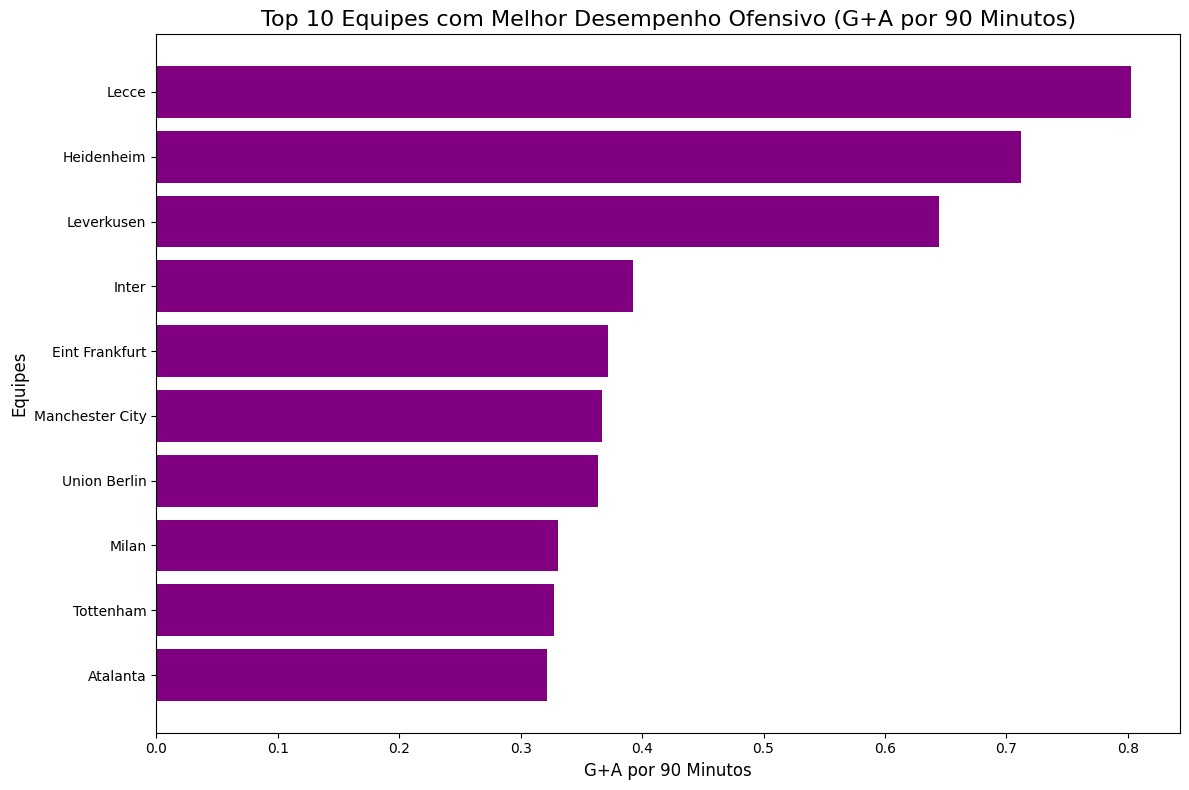

In [ ]:
# Selecionar as 10 melhores equipes com base em G+A_90
top_10_teams = best_teams.head(10)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras horizontais para o desempenho das equipes
plt.barh(top_10_teams['Squad'], top_10_teams['G+A_90'], color='purple')

# Adicionar títulos e rótulos
plt.title('Top 10 Equipes com Melhor Desempenho Ofensivo (G+A por 90 Minutos)', fontsize=16)
plt.xlabel('G+A por 90 Minutos', fontsize=12)
plt.ylabel('Equipes', fontsize=12)

# Inverter a ordem do eixo Y para o maior valor no topo
plt.gca().invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()


# 1. Conclusões Baseadas nas Análises

- Desempenho Ofensivo: Equipes com melhor desempenho ofensivo são aquelas que conseguem manter uma alta média de Gols + Assistências por 90 minutos (G+A_90). Esses times provavelmente têm um estilo de jogo mais ofensivo e eficaz, com jogadores-chave criando muitas oportunidades e finalizando bem.

    - Exemplo: Times como o Leverkusen e Napoli aparecem no topo do ranking por suas contribuições ofensivas, o que indica que seus sistemas de ataque são bem-sucedidos.

- Dependência de Jogadores-Chave: Algumas equipes mostram uma alta dependência de 3 ou 4 jogadores principais para gerar grande parte das chances e finalizações. Isso pode ser uma fraqueza, pois a ausência de um desses jogadores pode prejudicar o desempenho geral do time.

    - Exemplo: Equipes com alta dependência, como RB Leipzig ou Inter, podem enfrentar dificuldades se algum de seus jogadores-chave se lesionar ou for vendido.

- Eficiência Individual: Jogadores que, apesar de jogarem menos de 1000 minutos, apresentam um alto índice de contribuição ofensiva (G+A_90) são extremamente valiosos. Eles demonstram que têm impacto mesmo com tempo limitado em campo e podem ser subutilizados pelos técnicos.

    - Exemplo: Jogadores como Florian Wirtz e Kevin Stöger têm um alto impacto em campo, apesar de tempo limitado, indicando que merecem mais minutos.


# 2. Como Melhorar o Desempenho das Equipes

- Reduzir a Dependência de Jogadores-Chave: Equipes que dependem de poucos jogadores para criar jogadas ofensivas podem melhorar distribuindo a responsabilidade entre mais jogadores. Isso pode ser feito incentivando mais jogadores a contribuir ofensivamente, seja através de treinamento tático ou ajustes de formação.

- Foco em Contribuições Progressivas: Equipes com altas métricas de passes e conduções progressivas (PrgP e PrgC) tendem a ser mais eficazes em levar a bola para áreas perigosas. Melhorar o desempenho nessas métricas pode aumentar o número de chances de gol. Isso pode ser alcançado com treinamentos que visam a movimentação rápida e precisa da bola entre as linhas adversárias.

- Uso Eficiente de Jogadores Subvalorizados: Identificar jogadores que são altamente eficientes por minuto jogado e dar-lhes mais oportunidades pode aumentar o desempenho da equipe. Jogadores que têm uma alta contribuição ofensiva com poucos minutos jogados podem ser aproveitados melhor.

- Análise de Desempenho Individual em Função da Equipe: Monitorar métricas como xG+xAG_90 (gols e assistências esperados) pode ajudar a equipe a identificar jogadores que estão finalizando mal ou não aproveitando boas oportunidades. Isso permitirá que a equipe foque no treinamento de finalização ou ajuste na tomada de decisão em momentos críticos.


# 3. Quais Métricas São Mais Importantes para Avaliar Jogadores?

As métricas mais importantes para avaliar jogadores variam conforme a posição, mas podemos dividi-las em três grupos principais:

1. Atacantes e Meias Ofensivos:
- G+A por 90 minutos (G+A_90): Esta é a principal métrica para avaliar a contribuição ofensiva total de um jogador. Ela combina gols e assistências, refletindo o impacto direto no placar.
- xG + xAG (Gols Esperados + Assistências Esperadas): Esta métrica é crucial para avaliar a qualidade das chances criadas e recebidas. Jogadores com um valor de xG elevado estão se colocando em boas posições para finalizar, enquanto xAG alto indica criação de boas oportunidades de gol para outros.

2. Meio-Campistas:

- Passes Progressivos (PrgP) e Conduções Progressivas (PrgC): São métricas importantes para avaliar o impacto de um meio-campista na criação de jogadas e no avanço da bola. Jogadores com alto número de passes progressivos geralmente são os arquitetos do time, enquanto as conduções progressivas mostram habilidade em quebrar linhas de marcação ao carregar a bola.
- Assistências: Embora assistências sejam importantes, o número de chances criadas ou a métrica xAG também pode ser relevante para entender a visão de jogo e a capacidade de criar oportunidades.


### Conclusão

Para melhorar o desempenho de uma equipe, o ideal é combinar um equilíbrio entre redução de dependência em jogadores-chave, treinamentos voltados para progressão ofensiva, e uso mais eficiente de jogadores altamente eficientes.

Para avaliar jogadores, focar em métricas como G+A_90 para atacantes, passes progressivos para meio-campistas, e desarmes e intercepções para defensores fornece uma visão clara de como cada jogador está contribuindo para o sucesso do time.

# Crítica
Na base de estudo não foram fornecidos dados para uma análise defensiva dos jogadores e das equipes.
Por isso, não aprofundamos a análise defensiva.